Emily Hron Weigle <br>
ATMS 517 <br>
Dr. Alicia Klees <br>

## Scientific Objectives

The goal of this investigation was to determine if there is a statistically significant correllation over time between the cost of energy in the US and the effects of climate change. My hypothesis was that as climate change causes more significant, measureable, temperature events (such as heat/cold waves or higher/lower extreme temperatures), greater energy expenditure would be required to maintain comparable standards of habitability within the residential sector. The potential for a supply/demand relationship driver lends plausibility to the supposition that energy costs would increase as extreme temperature events become more frequent.

Although determined to be beyond the scope of this project, my hope was to then look at areas of the US that would be most impacted by climate change in the future, and be able to make predictions/draw conclusions regarding potential energy affordability in those regions. That research, if completed, could be of use in developing programs/planning (by governments/municipalities/non-profits, etc.) to ensure that no demographic/socioeconomic sector is disproportionately burdened by the cost of energy.



## Datasets

### [U.S. Energy Information Administration - Open Data - State-level and National Electricity Data](https://www.eia.gov/opendata/)
* Accessed via API.
* Units for pricing data = cents per kilowatthour
* Frequency: Monthly
* Granularity: by state
* Coverage: US

Variables included in this dataset are:
* period
* stateid
* stateDescription
* sectorid
* sectorName
* customers
* price
* revenue
* sales
for both the state and national levels.

Variables utilized from this datasource were primarily stateid and price.

Variable 'period' was used to correllate to the 'time' dimension.

### [CPC Global Unified Temperature](https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp.html)
* Units = degrees C
* Daily 1979/01/01 to 2023/12 (only utilized from 2000 onward)
* Granularity: 0.50 - degree latitude x 0.50 - degree longitude grid (720x360)
* Coverage: 89.75N-89.75SN, 0.25E-359.75E
* Frequency: Daily

Variables utilized from this datasource included tmax and tmin, the maximum and minimum (respectively) temperature as recorded daily at the surface for each of the gridpoints.

Dimensions are lat, lon, and time.

### [US Census Bureau geo/tiger/TIGER_RD18/LAYER/STATE](https://www2.census.gov/geo/tiger/TIGER_RD18/LAYER/STATE/)

Variables included in this dataset are:
* REGION
* DIVISION
* GEOID
* STUSPS
* INTPTLAT
* INTPTLON
* geometry

Variables utilized from this datasource were primarily STUSPS and geometry.

In [1]:
# import needed modules 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import urllib.request # module for downloading data from URLs, may need to install
import requests
import geopandas as gpd
import fiona
import os
import zipfile
import glob
import xarray as xr
import cartopy.crs as ccrs 
import bottleneck
from datetime import datetime
import seaborn as sb
from pyproj import CRS

import math
from scipy import stats

import statsmodels.api as sm

### Adding Temp Max Data

Reading in the daily max temperature data. Please use cells as needed.

In [2]:
current_dir = os.getcwd()
current_dir

'/Users/emilyhronweigle/ATMS_517/DataProject'

In [3]:
# os.chdir('DataProject')

In [4]:
os.chdir('cpc_global_temp_max')

In [5]:
current_dir = os.getcwd()
current_dir

'/Users/emilyhronweigle/ATMS_517/DataProject/cpc_global_temp_max'

In [6]:
all_files = glob.glob('*.nc')
print(all_files)  

['tmax.2022.nc', 'tmax.2016.nc', 'tmax.2006.nc', 'tmax.2012.nc', 'tmax.2002.nc', 'tmax.2013.nc', 'tmax.2003.nc', 'tmax.2017.nc', 'tmax.2007.nc', 'tmax.2018.nc', 'tmax.2008.nc', 'tmax.2019.nc', 'tmax.2009.nc', 'tmax.2010.nc', 'tmax.2000.nc', 'tmax.2020.nc', 'tmax.2014.nc', 'tmax.2004.nc', 'tmax.2021.nc', 'tmax.2015.nc', 'tmax.2005.nc', 'tmax.2011.nc', 'tmax.2001.nc']


In [7]:
list1 = []

for filename in all_files:
    ds = xr.open_dataset(filename)
    list1.append(ds)

In [8]:
ds2 = xr.concat(list1, dim='time')

### Adding Temp Min Data

Reading in daily min temperature data. Please use cells as needed.

In [9]:
current_dir = os.getcwd()
current_dir

'/Users/emilyhronweigle/ATMS_517/DataProject/cpc_global_temp_max'

In [10]:
os.chdir('../')

In [11]:
os.chdir('cpc_global_temp_min')

In [12]:
current_dir = os.getcwd()
current_dir

'/Users/emilyhronweigle/ATMS_517/DataProject/cpc_global_temp_min'

In [13]:
all_files2 = glob.glob('*.nc')
print(all_files2)  

['tmin.2011.nc', 'tmin.2001.nc', 'tmin.2021.nc', 'tmin.2015.nc', 'tmin.2005.nc', 'tmin.2020.nc', 'tmin.2014.nc', 'tmin.2004.nc', 'tmin.2010.nc', 'tmin.2000.nc', 'tmin.2019.nc', 'tmin.2009.nc', 'tmin.2018.nc', 'tmin.2008.nc', 'tmin.2017.nc', 'tmin.2007.nc', 'tmin.2013.nc', 'tmin.2003.nc', 'tmin.2012.nc', 'tmin.2002.nc', 'tmin.2022.nc', 'tmin.2016.nc', 'tmin.2006.nc']


In [14]:
list2 = []

for filename in all_files2:
    ds3 = xr.open_dataset(filename)
    list2.append(ds3)

In [15]:
print(ds3.head(5))

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 5, time: 5)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 87.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25
  * time     (time) datetime64[ns] 2006-01-01 2006-01-02 ... 2006-01-05
Data variables:
    tmin     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    history:        created 9/2016 by CAS NOAA/ESRL PSD
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...


In [16]:
ds4 = xr.concat(list2, dim='time')

### Finding the overlap b/w times

Double-checking that the time series for both the tmax and tmin data contain the same dates.

In [17]:
overlap = np.intersect1d(ds2.time,ds4.time)

In [18]:
ds2 = ds2.sel(time=overlap)
ds4 = ds4.sel(time=overlap)

### Merging Temp Max and Temp Min

Creating a single ds for temperature data (tmax and tmin).

In [19]:
data = xr.merge([ds2,ds4])

In [20]:
data

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 8401)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2022-12-31
Data variables:
    tmax     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    tmin     (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:    CF-1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...
    version:        V1.0
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    history:        Updated 2023-01-01 16:43:58

### Keeping just the US (temperature data) 

The temperature dataset I am using is a global dataset, however, I only have data relating to the price of electricity within the United States. Therefore, I can only use the temperature data from the US in my correlation(s).

In [21]:
lat_slice = slice(75, 15)
lon_slice = slice(180, 295)

data = data.sel(lat=lat_slice, lon=lon_slice)

### Converting away from 0-360 longitudinal system (temperature data)

In [22]:
data['lon'] = xr.where(data['lon'] > 180, data['lon'] - 360, data['lon'])

### Calulating Heating and Cooling Degree Days

Heating and Cooling Degree Days are industry/field-standard measures used (in layman's terms) to approximate how much energy will be expended to control the temperature of occupied spaces (i.e. heating or cooling a home depending on the weather outside). My temperature data set did not include these measures, so I calculated them myself.

* It is assumed that if the weather is 65 degrees F, then no energy will be expended in either heating or cooling.
* To determine heating or cooling degree days, compare the average daily temperature (tavg) to 65 degrees F - if tavg is above 65 degrees, energy will be expended for cooling. If tavg is below 65 degrees F, energy will be expended for heating.
* If tavg is above 65 degrees F, 65 degrees is subtracted from tavg. The difference is Cooling Degree Days.
* If tavg is below 65 degrees F, tavg is subtracted from 65 degrees F. The difference is Heating Degree Days.

Note that my temperature data was in degrees C, so I converted the threshold (65 degrees C) before completing calculations.

For more info on Heating/Cooling Degree Days, see [this](/https://www.weather.gov/key/climate_heat_cool#:~:text=If%20the%20temperature%20mean%20is,result%20is%20Heating%20Degree%20Days.&text=Because%20the%20result%20is%20below,F%20%3D%2036%20Heating%20Degree%20Days.) from the National Weather Service.

In [23]:
data.dims

Frozen({'lat': 120, 'lon': 230, 'time': 8401})

In [24]:
degree_days = np.empty_like(data['tmax'])

# without using numpy:
# degree_days = xr.full_like(temp['tmax', fill_value=None)

In [25]:
data['tavg'] = (data['tmax']+data['tmin'])/2 # calculating daily avg
data['heating_days'] = (('time','lat','lon'), degree_days) # modifying ds
data['cooling_days'] = (('time','lat','lon'), degree_days)

In [26]:
temp_cutoff = ((65-32)*(5/9)) # converting to degree C

cooling_days = xr.where(data['tavg'] > temp_cutoff, data['tavg'] - temp_cutoff, xr.full_like(data['tavg'], fill_value=np.nan))
data['cooling_days'] = cooling_days

heating_days = xr.where(data['tavg'] < temp_cutoff, temp_cutoff - data['tavg'], xr.full_like(data['tavg'], fill_value=np.nan))
data['heating_days'] = heating_days

In [27]:
data

<xarray.Dataset>
Dimensions:       (lat: 120, lon: 230, time: 8401)
Coordinates:
  * lat           (lat) float32 74.75 74.25 73.75 73.25 ... 16.25 15.75 15.25
  * lon           (lon) float32 -179.8 -179.2 -178.8 ... -66.25 -65.75 -65.25
  * time          (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2022-12-31
Data variables:
    tmax          (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tmin          (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tavg          (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    heating_days  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    cooling_days  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:    CF-1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...
    version:        V1.0
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    history:        Updated 2023-01-01 16:43:58

### Resampling - reduces size/helps with memory in addition to data processing step

In [28]:
data = data.resample(time="MS").mean() # reducing to monthly frequency, helps with memory

### Checking for Nans

In [29]:
nan_count = data.isnull().sum()
print(nan_count)

<xarray.Dataset>
Dimensions:       ()
Data variables:
    tmax          int64 4364736
    tmin          int64 4364736
    tavg          int64 4364736
    heating_days  int64 4630997
    cooling_days  int64 6561270


Yes, there do seem to be a lot of NaNs in this ds - but as you can see below, there are also a lot of points for which we have data. Since these values will be spatially averaged anyway--interpolation doesn't seem prudent at this time.

In [30]:
data_count = data.notnull().sum()
print(data_count)

<xarray.Dataset>
Dimensions:       ()
Data variables:
    tmax          int64 3252864
    tmin          int64 3252864
    tavg          int64 3252864
    heating_days  int64 2986603
    cooling_days  int64 1056330


### Calculating change in the number of heating or cooling degree days

For multiple variables, I hypothesized that it might be advantageous to consider the change between the earliest value in the dataset and the value for the timeseries coordinate of consideration. For example, if considering the number of cooling degree days for September 2019, subtracting the number of cooling degree days for September 2002 (2002 is the earliest year with data for both temperature and electricty pricing data) returns the change in that variable over time.

These calculations were difficult because Xarray ds operations can only be performed on datasets with the same dimensions and shape. I used loops to create disposable datasets with the early values (i.e. 2002, or "year 0") specifically for these calculations. 

#### Cooling Degree Days Loop

In [31]:
months = list(range(1, 13))

In [32]:
mon_list = []

for i in months:
    mon = data['cooling_days'].sel(time=(data['time.month'] == i)) # selecting the data for all instances of a single month - i.e. all the Januarys, etc.
    dims_to_copy = mon.dims    # ensuring dims and coords will match
    coords_to_copy = {dim: mon[dim] for dim in dims_to_copy}
    mon_new = xr.Dataset(coords=coords_to_copy)  # creating a new ds
    mon_2002 = data['cooling_days'].sel(time=(data['time.month'] == i) & (data['time.year'] == 2002)) # selecting just the 2002 data for the relevant month
    mon_merged = xr.merge([mon_new, mon_2002], join='outer') # adding the 2002 data to the new ds
    mon_filled = mon_merged.ffill(dim='time') # using ffill to 'copy' the 2002 data for each coord along the time dimension (lat/lon dimensions should already be correct)
    mon_list.append(mon_filled) # adding it to list to be concatenated later

In [33]:
mon_concat = xr.concat(mon_list, dim='time') # essentially this makes a ds with the data for each month in 2002 repeated over and over again (one time for each later year in the dataset)

#### Heating Degree Days Loop

In [34]:
mon_list2 = []

for i in months:
    mon = data['heating_days'].sel(time=(data['time.month'] == i))
    dims_to_copy = mon.dims
    coords_to_copy = {dim: mon[dim] for dim in dims_to_copy}
    mon_new = xr.Dataset(coords=coords_to_copy)
    mon_2002 = data['heating_days'].sel(time=(data['time.month'] == i) & (data['time.year'] == 2002))
    mon_merged = xr.merge([mon_new, mon_2002], join='outer')
    mon_filled = mon_merged.ffill(dim='time')
    mon_list2.append(mon_filled)

In [35]:
mon_concat2 = xr.concat(mon_list2, dim='time')

#### Change in tmax Loop

In [36]:
mon_list3 = []

for i in months:
    mon = data['tmax'].sel(time=(data['time.month'] == i))
    dims_to_copy = mon.dims
    coords_to_copy = {dim: mon[dim] for dim in dims_to_copy}
    mon_new = xr.Dataset(coords=coords_to_copy)
    mon_2002 = data['tmax'].sel(time=(data['time.month'] == i) & (data['time.year'] == 2002))
    mon_merged = xr.merge([mon_new, mon_2002], join='outer')
    mon_filled = mon_merged.ffill(dim='time')
    mon_list3.append(mon_filled)

In [37]:
mon_concat3 = xr.concat(mon_list3, dim='time')

#### Change in tmin Loop

In [38]:
mon_list4 = []

for i in months:
    mon = data['tmin'].sel(time=(data['time.month'] == i))
    dims_to_copy = mon.dims
    coords_to_copy = {dim: mon[dim] for dim in dims_to_copy}
    mon_new = xr.Dataset(coords=coords_to_copy)
    mon_2002 = data['tmin'].sel(time=(data['time.month'] == i) & (data['time.year'] == 2002))
    mon_merged = xr.merge([mon_new, mon_2002], join='outer')
    mon_filled = mon_merged.ffill(dim='time')
    mon_list4.append(mon_filled)

In [39]:
mon_concat4 = xr.concat(mon_list4, dim='time')

#### Change in tavg Loop

In [40]:
mon_list5 = []

for i in months:
    mon = data['tavg'].sel(time=(data['time.month'] == i))
    dims_to_copy = mon.dims
    coords_to_copy = {dim: mon[dim] for dim in dims_to_copy}
    mon_new = xr.Dataset(coords=coords_to_copy)
    mon_2002 = data['tavg'].sel(time=(data['time.month'] == i) & (data['time.year'] == 2002))
    mon_merged = xr.merge([mon_new, mon_2002], join='outer')
    mon_filled = mon_merged.ffill(dim='time')
    mon_list5.append(mon_filled)

In [41]:
mon_concat5 = xr.concat(mon_list5, dim='time')

#### Sticking it all together

In [42]:
mon_concat_merged = xr.merge([mon_concat, mon_concat2, mon_concat3, mon_concat4, mon_concat5], join='outer')

In [43]:
mon_concat_merged = mon_concat_merged.rename({'cooling_days': 'cooling_2002', 'heating_days' : 'heating_2002', 'tmin' : 'tmin_2002', 'tmax' : 'tmax_2002', 'tavg' : 'tavg_2002'})

In [44]:
mon_concat_merged

<xarray.Dataset>
Dimensions:       (time: 276, lat: 120, lon: 230)
Coordinates:
  * time          (time) datetime64[ns] 2000-01-01 2001-01-01 ... 2022-12-01
  * lat           (lat) float32 74.75 74.25 73.75 73.25 ... 16.25 15.75 15.25
  * lon           (lon) float32 -179.8 -179.2 -178.8 ... -66.25 -65.75 -65.25
Data variables:
    cooling_2002  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    heating_2002  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tmax_2002     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tmin_2002     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tavg_2002     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan

In [45]:
data_count = mon_concat_merged.notnull().sum()
print(data_count)

<xarray.Dataset>
Dimensions:       ()
Data variables:
    cooling_2002  int64 1043196
    heating_2002  int64 2919840
    tmax_2002     int64 3205440
    tmin_2002     int64 3205440
    tavg_2002     int64 3205440


### Calculating the differences over time for variables from month/year_0 (month, 2002) to month/year of consideration

In [46]:
data['heating_diff'] = data['heating_days'] - mon_concat_merged['heating_2002']
data['cooling_diff'] = data['cooling_days'] - mon_concat_merged['cooling_2002']
data['tmax_diff'] = data['tmax'] - mon_concat_merged['tmax_2002']
data['tmin_diff'] = data['tmin'] - mon_concat_merged['tmin_2002']
data['tavg_diff'] = data['tavg'] - mon_concat_merged['tavg_2002']

In [47]:
data

<xarray.Dataset>
Dimensions:       (lat: 120, lon: 230, time: 276)
Coordinates:
  * lat           (lat) float32 74.75 74.25 73.75 73.25 ... 16.25 15.75 15.25
  * lon           (lon) float32 -179.8 -179.2 -178.8 ... -66.25 -65.75 -65.25
  * time          (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2022-12-01
Data variables:
    tmax          (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tmin          (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tavg          (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    heating_days  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    cooling_days  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    heating_diff  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    cooling_diff  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tmax_diff     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tmin_diff     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tavg_diff     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:    CF-1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...
    version:        V1.0
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    history:        Updated 2023-01-01 16:43:58

Sure looks like a lot of NaNs - investigating below:

In [48]:
data_count = data.notnull().sum()
print(data_count)

<xarray.Dataset>
Dimensions:       ()
Data variables:
    tmax          int64 3252864
    tmin          int64 3252864
    tavg          int64 3252864
    heating_days  int64 2986603
    cooling_days  int64 1056330
    heating_diff  int64 2680101
    cooling_diff  int64 864706
    tmax_diff     int64 2947584
    tmin_diff     int64 2947584
    tavg_diff     int64 2947584


Since there are a substantial number of non-null datapoints, I am not going to interpolate at this point.

### Importing States FIPS info

The temperature data is based on lat/lon points that cover the US (initial ds covered the globe and was sliced). The electricity data is based off of states (identified with state names/abbreviations). In order to merge these datasets, I'll be using a spatial join (geopandas). This dataset has the polygon/multipolygon geometry for the states associated with state names/abbreviations.

In [49]:
current_dir = os.getcwd()
current_dir

'/Users/emilyhronweigle/ATMS_517/DataProject/cpc_global_temp_min'

In [50]:
os.chdir('../')

In [51]:
current_dir = os.getcwd()
current_dir

'/Users/emilyhronweigle/ATMS_517/DataProject'

In [52]:
zipfile = "tl_rd22_us_state.zip"
states = gpd.read_file(zipfile, include_fields=["REGION", "DIVISION", "GEOID", "STUSPS", "INTPTLAT", "INTPTLON"])

In [53]:
states.columns

Index(['REGION', 'DIVISION', 'GEOID', 'STUSPS', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')

In [54]:
print(states.dtypes)

REGION        object
DIVISION      object
GEOID         object
STUSPS        object
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object


In [55]:
print(states.crs)

EPSG:4269


In [56]:
states

REGION DIVISION GEOID STUSPS     INTPTLAT      INTPTLON  \
0       3        5    54     WV  +38.6472854  -080.6183274   
1       3        5    12     FL  +28.3989775  -082.5143005   
2       2        3    17     IL  +40.1028754  -089.1526108   
3       2        4    27     MN  +46.3159573  -094.1996043   
4       3        5    24     MD  +38.9466584  -076.6744939   
5       1        1    44     RI  +41.5964850  -071.5264901   
6       4        8    16     ID  +44.3484222  -114.5588538   
7       1        1    33     NH  +43.6726907  -071.5843145   
8       3        5    37     NC  +35.5397100  -079.1308636   
9       1        1    50     VT  +44.0589536  -072.6710173   
10      1        1    09     CT  +41.5798637  -072.7466572   
11      3        5    10     DE  +38.9985661  -075.4416440   
12      4        8    35     NM  +34.4346843  -106.1316181   
13      4        9    06     CA  +37.1551773  -119.5434183   
14      1        2    34     NJ  +40.1072744  -074.6652012   
15      2        3    55     WI  +44.6309071  -089.7093916   
16      4        9    41     OR  +43.9717125  -120.6229578   
17      2        4    31     NE  +41.5433053  -099.8118646   
18      1        2    42     PA  +40.9046013  -077.8275298   
19      4        9    53     WA  +47.4073238  -120.5757999   
20      3        7    22     LA  +30.8634368  -091.7987173   
21      3        5    13     GA  +32.6295789  -083.4235109   
22      3        6    01     AL  +32.7396323  -086.8434593   
23      4        8    49     UT  +39.3349925  -111.6563326   
24      2        3    39     OH  +40.4149297  -082.7119975   
25      3        7    48     TX  +31.4347032  -099.2818238   
26      4        8    08     CO  +38.9937669  -105.5087122   
27      3        5    45     SC  +33.8741776  -080.8542639   
28      3        7    40     OK  +35.5900815  -097.4867789   
29      3        6    47     TN  +35.8584600  -086.3496339   
30      4        8    56     WY  +42.9896591  -107.5443922   
31      4        9    15     HI  +19.8281671  -155.4950421   
32      2        4    38     ND  +47.4421740  -100.4608258   
33      3        6    21     KY  +37.5336844  -085.2929801   
34      9        0    78     VI  +18.3392359  -064.9500433   
35      9        0    69     MP  +15.0010865  +145.6181702   
36      9        0    66     GU  +13.4417451  +144.7719021   
37      1        1    23     ME  +45.4092843  -068.6666160   
38      1        2    36     NY  +42.9133974  -075.5962723   
39      4        8    32     NV  +39.3310928  -116.6151469   
40      4        9    02     AK  +63.3473560  -152.8397334   
41      9        0    60     AS  -14.2671590  -170.6682674   
42      2        3    26     MI  +44.8441768  -085.6604907   
43      3        7    05     AR  +34.8955256  -092.4446262   
44      3        6    28     MS  +32.6864714  -089.6561377   
45      2        4    29     MO  +38.3507500  -092.4567826   
46      4        8    30     MT  +47.0511770  -109.6348174   
47      2        4    20     KS  +38.4985464  -098.3834298   
48      2        3    18     IN  +39.9013136  -086.2919129   
49      9        0    72     PR  +18.2176480  -066.4107992   
50      2        4    46     SD  +44.4467957  -100.2381762   
51      1        1    25     MA  +42.1565196  -071.4895915   
52      3        5    51     VA  +37.5222512  -078.6681938   
53      3        5    11     DC  +38.9042474  -077.0165167   
54      2        4    19     IA  +42.0700243  -093.4933473   
55      4        8    04     AZ  +34.2039362  -111.6063449   

                                             geometry  
0   POLYGON ((-81.74725 39.09538, -81.74635 39.096...  
1   MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...  
2   POLYGON ((-91.18529 40.63780, -91.17510 40.643...  
3   POLYGON ((-96.78438 46.63050, -96.78434 46.630...  
4   POLYGON ((-77.45881 39.22027, -77.45866 39.220...  
5   MULTIPOLYGON (((-71.78970 41.72520, -71.78971 ...  
6   POLYGON ((-116.89971 44.84061, -116.89967 44.8...  
7   POLYGON ((-72.32

### Reprojecting CRS for States data

In [57]:
crs = CRS.from_epsg(4326)
states.crs = crs

In [58]:
states['saved_geometry'] = states['geometry'] # necessary b/c otherwise sjoin will drop geometry column

### Creating a new  Xarray ds for spatial join - this will be converted to gdf

Doing it this way--creating a separate, smaller, ds specifically for the spatial join--made a big difference when it came to memory usage.

In [59]:
dims_to_copy = ['lat', 'lon']

In [60]:
point_data = xr.Dataset()

for dim in dims_to_copy:
    point_data[dim] = data[dim]

In [61]:
point_data

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 230)
Coordinates:
  * lat      (lat) float32 74.75 74.25 73.75 73.25 ... 16.75 16.25 15.75 15.25
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... -66.25 -65.75 -65.25
Data variables:
    *empty*

### Converting smaller ds to Geopandas DF

I'll be using Geopandas for my spatial join.

In [62]:
point_data = point_data.to_dataframe()

In [63]:
point_data = point_data.reset_index()

In [64]:
point_data = gpd.GeoDataFrame(point_data, geometry=gpd.points_from_xy(point_data.lon, point_data.lat))

In [65]:
point_data

lat     lon                     geometry
0      74.75 -179.75  POINT (-179.75000 74.75000)
1      74.75 -179.25  POINT (-179.25000 74.75000)
2      74.75 -178.75  POINT (-178.75000 74.75000)
3      74.75 -178.25  POINT (-178.25000 74.75000)
4      74.75 -177.75  POINT (-177.75000 74.75000)
...      ...     ...                          ...
27595  15.25  -67.25   POINT (-67.25000 15.25000)
27596  15.25  -66.75   POINT (-66.75000 15.25000)
27597  15.25  -66.25   POINT (-66.25000 15.25000)
27598  15.25  -65.75   POINT (-65.75000 15.25000)
27599  15.25  -65.25   POINT (-65.25000 15.25000)

[27600 rows x 3 columns]

In [66]:
crs = CRS.from_epsg(4326)
point_data['geometry'].crs = crs

### Spatial Join

This spatial join matches each row from the point_data geodataframe (which correlates to the temperature data) to the polygon of the state of which it is within (or, in other words, "intersects").

In [67]:
joined = gpd.sjoin(point_data, states, how='left', predicate='intersects')

In [68]:
joined

lat     lon                     geometry  index_right REGION  \
0      74.75 -179.75  POINT (-179.75000 74.75000)          NaN    NaN   
1      74.75 -179.25  POINT (-179.25000 74.75000)          NaN    NaN   
2      74.75 -178.75  POINT (-178.75000 74.75000)          NaN    NaN   
3      74.75 -178.25  POINT (-178.25000 74.75000)          NaN    NaN   
4      74.75 -177.75  POINT (-177.75000 74.75000)          NaN    NaN   
...      ...     ...                          ...          ...    ...   
27595  15.25  -67.25   POINT (-67.25000 15.25000)          NaN    NaN   
27596  15.25  -66.75   POINT (-66.75000 15.25000)          NaN    NaN   
27597  15.25  -66.25   POINT (-66.25000 15.25000)          NaN    NaN   
27598  15.25  -65.75   POINT (-65.75000 15.25000)          NaN    NaN   
27599  15.25  -65.25   POINT (-65.25000 15.25000)          NaN    NaN   

      DIVISION GEOID STUSPS INTPTLAT INTPTLON saved_geometry  
0          NaN   NaN    NaN      NaN      NaN           None  
1          NaN   NaN    NaN      NaN      NaN           None  
2          NaN   NaN    NaN      NaN      NaN           None  
3          NaN   NaN    NaN      NaN      NaN           None  
4          NaN   NaN    NaN      NaN      NaN           None  
...        ...   ...    ...      ...      ...            ...  
27595      NaN   NaN    NaN      NaN      NaN           None  
27596      NaN   NaN    NaN      NaN      NaN           None  
27597      NaN   NaN    NaN      NaN      NaN           None  
27598      NaN   NaN    NaN      NaN      NaN           None  
27599      NaN   NaN    NaN      NaN      NaN           None  

[27600 rows x 11 columns]

In [69]:
# I believe all of the NaNs (rows that did not match) should be over the ocean--let's check

nan_rows = joined[joined['STUSPS'].isnull()]

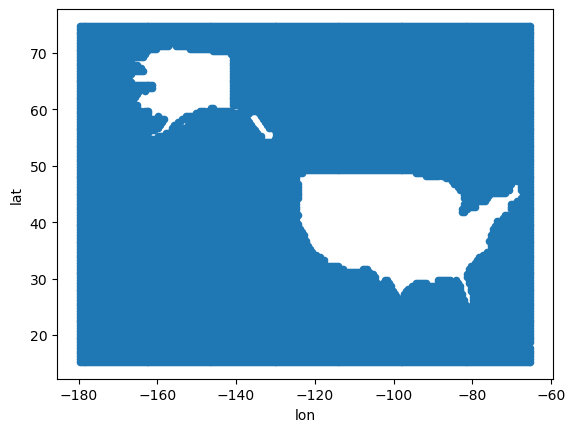

In [70]:
nan_rows.plot.scatter(x='lon', y='lat')

plt.show()

In [71]:
# Dropping values over the ocean

joined = joined.dropna(subset=['STUSPS'])

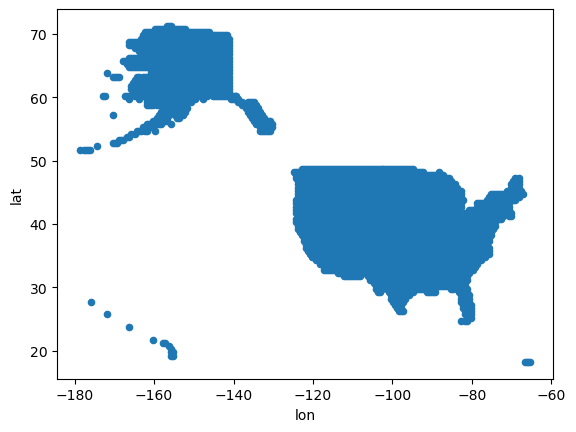

In [72]:
joined.plot.scatter(x='lon', y='lat')

plt.show()

In [73]:
joined = joined.drop(columns='index_right')

### Converting gdf (points and polygons/stateids) to Pandas df to merge with temperature data

Now, I'll use an attribute (using lat, lon) merge to transfer the state ids/names back to the dataset with the main temperature data

In [74]:
joined = pd.DataFrame(joined)

In [75]:
data_count = joined.notnull().sum()
print(data_count)

lat               4675
lon               4675
geometry          4675
REGION            4675
DIVISION          4675
GEOID             4675
STUSPS            4675
INTPTLAT          4675
INTPTLON          4675
saved_geometry    4675
dtype: int64


In [76]:
nan_count = joined.isnull().sum()
print(nan_count)

lat               0
lon               0
geometry          0
REGION            0
DIVISION          0
GEOID             0
STUSPS            0
INTPTLAT          0
INTPTLON          0
saved_geometry    0
dtype: int64


### Converting Xarray (temperature data) to Pandas df for merge

In [77]:
data = data.to_dataframe()

In [78]:
data

tmax  tmin  tavg  heating_days  cooling_days  \
lat   lon     time                                                       
74.75 -179.75 2000-01-01   NaN   NaN   NaN           NaN           NaN   
              2000-02-01   NaN   NaN   NaN           NaN           NaN   
              2000-03-01   NaN   NaN   NaN           NaN           NaN   
              2000-04-01   NaN   NaN   NaN           NaN           NaN   
              2000-05-01   NaN   NaN   NaN           NaN           NaN   
...                        ...   ...   ...           ...           ...   
15.25 -65.25  2022-08-01   NaN   NaN   NaN           NaN           NaN   
              2022-09-01   NaN   NaN   NaN           NaN           NaN   
              2022-10-01   NaN   NaN   NaN           NaN           NaN   
              2022-11-01   NaN   NaN   NaN           NaN           NaN   
              2022-12-01   NaN   NaN   NaN           NaN           NaN   

                          heating_diff  cooling_diff  tmax_diff  tmin_diff  \
lat   lon     time                                                           
74.75 -179.75 2000-01-01           NaN           NaN        NaN        NaN   
              2000-02-01           NaN           NaN        NaN        NaN   
              2000-03-01           NaN           NaN        NaN        NaN   
              2000-04-01           NaN           NaN        NaN        NaN   
              2000-05-01           NaN           NaN        NaN        NaN   
...                                ...           ...        ...        ...   
15.25 -65.25  2022-08-01           NaN           NaN        NaN        NaN   
              2022-09-01           NaN           NaN        NaN        NaN   
              2022-10-01           NaN           NaN        NaN        NaN   
              2022-11-01           NaN           NaN        NaN        NaN   
              2022-12-01           NaN           NaN        NaN        NaN   

                          tavg_diff  
lat   lon     time                   
74.75 -179.75 2000-01-01        NaN  
              2000-02-01        NaN  
              2000-03-01        NaN  
              2000-04-01        NaN  
              2000-05-01        NaN  
...                             ...  
15.25 -65.25  2022-08-01        NaN  
              2022-09-01        NaN  
              2022-10-01        NaN  
              2022-11-01        NaN  
              2022-12-01        NaN  

[7617600 rows x 10 columns]

In [79]:
data.reset_index(inplace=True)

In [80]:
data.dropna(inplace=True)

In [81]:
data_count = data.notnull().sum()
print(data_count)

lat             597223
lon             597223
time            597223
tmax            597223
tmin            597223
tavg            597223
heating_days    597223
cooling_days    597223
heating_diff    597223
cooling_diff    597223
tmax_diff       597223
tmin_diff       597223
tavg_diff       597223
dtype: int64


In [82]:
nan_count = data.isnull().sum()
print(nan_count)

lat             0
lon             0
time            0
tmax            0
tmin            0
tavg            0
heating_days    0
cooling_days    0
heating_diff    0
cooling_diff    0
tmax_diff       0
tmin_diff       0
tavg_diff       0
dtype: int64


### Pandas Merge (points & stateids with temperature data)

In [83]:
data = pd.merge(joined, data, on=['lat', 'lon'], how='inner')

In [84]:
data.columns

Index(['lat', 'lon', 'geometry', 'REGION', 'DIVISION', 'GEOID', 'STUSPS',
       'INTPTLAT', 'INTPTLON', 'saved_geometry', 'time', 'tmax', 'tmin',
       'tavg', 'heating_days', 'cooling_days', 'heating_diff', 'cooling_diff',
       'tmax_diff', 'tmin_diff', 'tavg_diff'],
      dtype='object')

In [85]:
nan_count = data.isnull().sum()
print(nan_count)

lat               0
lon               0
geometry          0
REGION            0
DIVISION          0
GEOID             0
STUSPS            0
INTPTLAT          0
INTPTLON          0
saved_geometry    0
time              0
tmax              0
tmin              0
tavg              0
heating_days      0
cooling_days      0
heating_diff      0
cooling_diff      0
tmax_diff         0
tmin_diff         0
tavg_diff         0
dtype: int64


In [86]:
data

lat     lon                     geometry REGION DIVISION GEOID  \
0       70.25 -147.75  POINT (-147.75000 70.25000)      4        9    02   
1       70.25 -147.75  POINT (-147.75000 70.25000)      4        9    02   
2       70.25 -147.75  POINT (-147.75000 70.25000)      4        9    02   
3       70.25 -147.75  POINT (-147.75000 70.25000)      4        9    02   
4       70.25 -147.75  POINT (-147.75000 70.25000)      4        9    02   
...       ...     ...                          ...    ...      ...   ...   
331112  19.75 -155.75  POINT (-155.75000 19.75000)      4        9    15   
331113  19.75 -155.75  POINT (-155.75000 19.75000)      4        9    15   
331114  19.75 -155.25  POINT (-155.25000 19.75000)      4        9    15   
331115  19.75 -155.25  POINT (-155.25000 19.75000)      4        9    15   
331116  19.75 -155.25  POINT (-155.25000 19.75000)      4        9    15   

       STUSPS     INTPTLAT      INTPTLON  \
0          AK  +63.3473560  -152.8397334   
1          AK  +63.3473560  -152.8397334   
2          AK  +63.3473560  -152.8397334   
3          AK  +63.3473560  -152.8397334   
4          AK  +63.3473560  -152.8397334   
...       ...          ...           ...   
331112     HI  +19.8281671  -155.4950421   
331113     HI  +19.8281671  -155.4950421   
331114     HI  +19.8281671  -155.4950421   
331115     HI  +19.8281671  -155.4950421   
331116     HI  +19.8281671  -155.4950421   

                                           saved_geometry  ...       tmax  \
0       MULTIPOLYGON (((-165.25416 60.91711, -165.2630...  ...  16.963032   
1       MULTIPOLYGON (((-165.25416 60.91711, -165.2630...  ...  16.944902   
2       MULTIPOLYGON (((-165.25416 60.91711, -165.2630...  ...  13.210714   
3       MULTIPOLYGON (((-165.25416 60.91711, -165.2630...  ...  19.260429   
4       MULTIPOLYGON (((-165.25416 60.91711, -165.2630...  ...  14.547167   
...                                                   ...  ...        ...   
331112  MULTIPOLYGON (((-155.43286 20.14521, -155.4315...  ...  22.802200   
331113  MULTIPOLYGON (((-155.43286 20.14521, -155.4315...  ...  24.002535   
331114  MULTIPOLYGON (((-155.43286 20.14521, -155.4315...  ...  24.625586   
331115  MULTIPOLYGON (((-155.43286 20.14521, -155.4315...  ...  24.372137   
331116  MULTIPOLYGON (((-155.43286 20.14521, -155.4315...  ...  24.079006   

             tmin       tavg  heating_days  cooling_days  heating_diff  \
0        6.937356  11.950195      7.103423      0.339510      0.000000   
1        8.758467  12.851685      6.117195      0.450120     -0.986228   
2        6.594334   9.902525      8.747358      1.065672      1.643936   
3        9.297794  14.279112      4.300938      3.347292     -2.802485   
4        6.979478  10.763320      8.183229      1.321626      1.079807   
...           ...        ...           ...           ...           ...   
331112  14.595285  18.698742      1.114357      1.752688      0.073103   
331113  15.964220  19.983377      0.184574      1.713307     -0.180195   
331114  16.458803  20.542192      0.646556      2.514797      0.000000   
331115  17.521841  20.946989      0.476299      2.826759     -0.170256   
331116  15.792413  19.935709      0.740776      2.052983      0.094220   

        cooling_diff  tmax_diff  tmin_diff  tavg_diff  
0           0.000000   0.000000   0.000000   0.000000  
1           0.110610  -0.018129   1.821111   0.901489  
2           0.726162  -3.752317  -0.343022  -2.047670  
3           3.007782   2.297398   2.360438   2.328917  
4           0.982116  -2.415865   0.042122  -1.186875  
...              ...        ...        ...        ...  
331112     -0.082889  -0.555014  -0.714905  -0.634962  
331113     -0.994588  -1.001183  -0.909674  -0.955433  
331114      0.000000   0.000000   0.000000   0.000000  
331115      0.311962  -0.253448   1.063038   0.404797  
331116     -0.461814  -0.546579  -0.666390  -0.606483  

[331117 rows x 21 columns]

### Distribution

In [87]:
max_tavg = data['tavg'].values.max() 
min_tavg = data['tavg'].values.min() 

bins = np.arange(math.floor(min_tavg), math.ceil(max_tavg),)
print(bins)
print(type(bins))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28]
<class 'numpy.ndarray'>


In [88]:
alpha, loc, beta=stats.gamma.fit(data['tavg'])
mu, std=stats.norm.fit(data['tavg'])

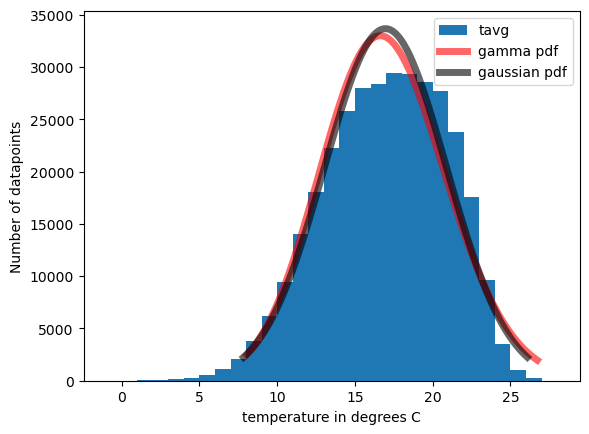

In [89]:
fig,ax = plt.subplots()

ax.hist(data['tavg'],bins,label='tavg')
ax.set_xlabel('temperature in degrees C')
ax.set_ylabel('Number of datapoints')

# create x-values (gamma)
x = np.linspace(stats.gamma.ppf(0.01, alpha,loc,beta),
               stats.gamma.ppf(0.99, alpha,loc,beta), 100)

# plot the gamma dist
ax.plot(x, len(data['tavg'])*stats.gamma.pdf(x,alpha,loc,beta),
          'r-', lw=5, alpha=0.6, label='gamma pdf')

# create x-values (normal)
x = np.linspace(stats.norm.ppf(0.01,mu,std),
               stats.norm.ppf(0.99,mu,std), 100)

# plot the normal dist 
ax.plot(x, len(data['tavg'])*stats.norm.pdf(x,mu,std),
          'k-', lw=5, alpha=0.6, label='gaussian pdf')

ax.legend()

Text(0.5, 1.0, 'tavg in Degrees C After Yeo-Johnson - Fit to Gamma Distribution')

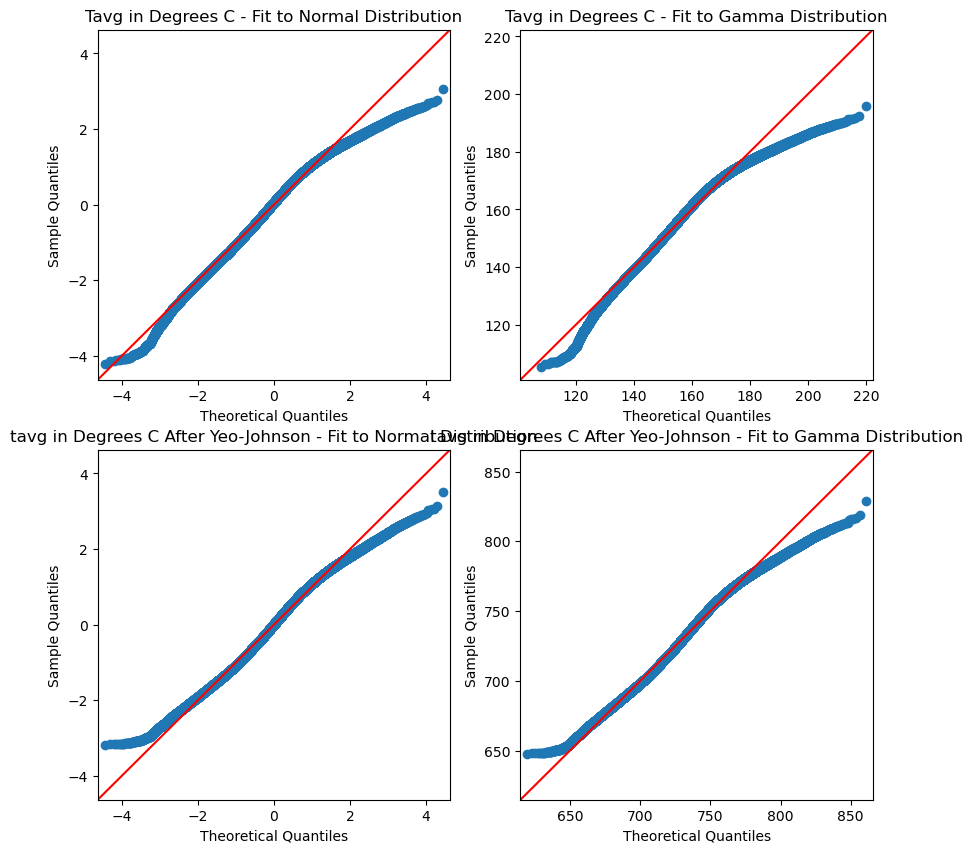

In [216]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

sm.qqplot(data['tavg'],fit=True,dist=stats.gamma,line = '45', ax=axes[0,1])
axes[0,1].set_title('Tavg in Degrees C - Fit to Gamma Distribution')

sm.qqplot(data['tavg'],fit=True,dist=stats.norm,line = '45', ax=axes[0,0])
axes[0,0].set_title('Tavg in Degrees C - Fit to Normal Distribution')

xt,_ = stats.yeojohnson(data['tavg'])
sm.qqplot(xt, fit=True, dist=stats.norm,line='45', ax=axes[1,0])
axes[1,0].set_title('tavg in Degrees C After Yeo-Johnson - Fit to Normal Distribution')

xt,_ = stats.yeojohnson(data['tavg'])
sm.qqplot(xt, fit=True, dist=stats.gamma,line='45', ax=axes[1,1])
axes[1,1].set_title('tavg in Degrees C After Yeo-Johnson - Fit to Gamma Distribution')

### Importing Electricity Pricing data

In [91]:
temporary = open('2023-1010_TotalUSAvg_SalesData.csv')
elec = pd.read_csv('2023-1010_TotalUSAvg_SalesData.csv', parse_dates=['period'])

In [92]:
temporary = open('2023-1006_ElecSales.csv')
elec_states = pd.read_csv('2023-1006_ElecSales.csv', parse_dates=['period'])

In [93]:
print(elec.columns)

Index(['period', 'stateid', 'stateDescription', 'sectorid', 'sectorName',
       'customers', 'price', 'revenue', 'sales', 'customers-units',
       'price-units', 'revenue-units', 'sales-units'],
      dtype='object')


In [94]:
elec.rename(columns={"stateid": "stateid_natl","stateDescription": "stateDescription_natl",
                      "sectorid":"sectorid_natl","sectorName":"sectorName_natl",
                      "customers":"customers_natl","price": "price_natl","revenue":"revenue_natl",
                      "sales":"sales_natl","customers-units":"customer-units_natl",
                      "price-units":"price-units_natl","revenue-units":"revenue-units_natl",
                      "sales-units":"sales-units_natl"}, inplace=True)

In [95]:
elec = pd.merge(elec_states, elec, on='period', how='left')

In [96]:
elec.drop(columns=['stateDescription','sectorid', 'sectorName','revenue', 'sales','customers-units','price-units','revenue-units','sales-units','stateid_natl','stateDescription_natl', 'sectorid_natl', 'sectorName_natl', 'revenue_natl', 'sales_natl', 'customer-units_natl', 'price-units_natl', 'revenue-units_natl', 'sales-units_natl'], inplace=True)

In [97]:
elec['price_diff'] = (elec['price'] - elec['price_natl'])

In [98]:
elec['price_diff_percent'] = ((elec['price_diff'] / elec['price_natl']))*100

In [99]:
elec

period stateid   customers  price  customers_natl  price_natl  \
0     2022-12-01      HI    443737.0  44.78     140827460.0       14.96   
1     2022-12-01      AL   2340958.0  13.17     140827460.0       14.96   
2     2022-12-01      CO   2439220.0  14.24     140827460.0       14.96   
3     2022-12-01      CA  14221047.0  24.46     140827460.0       14.96   
4     2022-12-01      AR   1454246.0  11.17     140827460.0       14.96   
...          ...     ...         ...    ...             ...         ...   
12843 2002-01-01      ME         NaN  10.66             NaN        8.07   
12844 2002-01-01      MD         NaN   6.92             NaN        8.07   
12845 2002-01-01      IA         NaN   7.65             NaN        8.07   
12846 2002-01-01      KS         NaN   6.91             NaN        8.07   
12847 2002-01-01      KY         NaN   5.26             NaN        8.07   

       price_diff  price_diff_percent  
0           29.82          199.331551  
1           -1.79          -11.965241  
2           -0.72           -4.812834  
3            9.50           63.502674  
4           -3.79          -25.334225  
...           ...                 ...  
12843        2.59           32.094176  
12844       -1.15          -14.250310  
12845       -0.42           -5.204461  
12846       -1.16          -14.374226  
12847       -2.81          -34.820322  

[12848 rows x 8 columns]

### Calculating change in electricity price and price difference from the natl avg Loop

In [100]:
state_names = elec['stateid'].unique()

In [101]:
state_names

array(['HI', 'AL', 'CO', 'CA', 'AR', 'AZ', 'AK', 'NM', 'NJ', 'NH', 'OH',
       'ND', 'NC', 'NY', 'NV', 'NE', 'MT', 'MO', 'MS', 'MA', 'MD', 'ME',
       'LA', 'KY', 'MN', 'MI', 'IN', 'IL', 'ID', 'GA', 'FL', 'DC', 'DE',
       'TX', 'TN', 'SD', 'SC', 'RI', 'PA', 'OR', 'OK', 'WY', 'WI', 'WV',
       'KS', 'IA', 'WA', 'VA', 'VT', 'UT', 'CT'], dtype=object)

In [102]:
state_list = []

for i in state_names:
    state = elec.loc[elec['stateid'] == str(i), :]
    state['month'] = state['period'].dt.month
    state_2002 = elec.loc[(elec['stateid'] == str(i)) & (elec['period'].dt.year == 2002), :]
    state_2002['month'] = state_2002['period'].dt.month
    state_merged = pd.merge(state, state_2002, on='month', how='left', suffixes=('_present', '_2002'))
    state_merged['chang_price_diff'] = (state_merged['price_diff_present']-state_merged['price_diff_2002'])
    state_merged['chang_price_diff_pct'] = (state_merged['price_diff_percent_present']-state_merged['price_diff_percent_2002'])
    state_list.append(state_merged)
    

/var/folders/nh/68crdkvd2bj5t8xr_pm2gz_w0000gn/T/ipykernel_55675/696882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state['month'] = state['period'].dt.month
/var/folders/nh/68crdkvd2bj5t8xr_pm2gz_w0000gn/T/ipykernel_55675/696882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_2002['month'] = state_2002['period'].dt.month
/var/folders/nh/68crdkvd2bj5t8xr_pm2gz_w0000gn/T/ipykernel_55675/696882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [103]:
elec = pd.concat(state_list, ignore_index=True)

In [104]:
print(elec.columns)

Index(['period_present', 'stateid_present', 'customers_present',
       'price_present', 'customers_natl_present', 'price_natl_present',
       'price_diff_present', 'price_diff_percent_present', 'month',
       'period_2002', 'stateid_2002', 'customers_2002', 'price_2002',
       'customers_natl_2002', 'price_natl_2002', 'price_diff_2002',
       'price_diff_percent_2002', 'chang_price_diff', 'chang_price_diff_pct'],
      dtype='object')


In [105]:
elec = elec.drop(columns=['month', 'period_2002', 'stateid_2002', 'customers_2002', 'price_2002', 'customers_natl_2002', 'price_natl_2002', 'price_diff_2002', 'price_diff_percent_2002'])

In [106]:
elec = elec.rename(columns={'period_present': 'period', 'stateid_present': 'stateid', 'customers_present': 'customers',
       'price_present': 'price', 'customers_natl_present': 'customers_natl', 'price_natl_present': 'price_natl',
       'price_diff_present': 'price_diff', 'price_diff_percent_present':'price_diff_percent'})


In [107]:
elec

period stateid  customers  price  customers_natl  price_natl  \
0     2022-12-01      HI   443737.0  44.78     140827460.0       14.96   
1     2022-11-01      HI   445391.0  43.80     140203229.0       15.64   
2     2022-10-01      HI   445080.0  44.71     140339016.0       16.01   
3     2022-09-01      HI   445132.0  45.58     140265361.0       16.31   
4     2022-08-01      HI   445124.0  45.55     140587372.0       15.93   
...          ...     ...        ...    ...             ...         ...   
12843 2002-05-01      CT        NaN  11.24             NaN        8.64   
12844 2002-04-01      CT        NaN  11.07             NaN        8.37   
12845 2002-03-01      CT        NaN  10.94             NaN        8.17   
12846 2002-02-01      CT        NaN  10.86             NaN        8.19   
12847 2002-01-01      CT        NaN  10.65             NaN        8.07   

       price_diff  price_diff_percent  chang_price_diff  chang_price_diff_pct  
0           29.82          199.331551             21.10             91.410759  
1           28.16          180.051151             19.80             79.449466  
2           28.70          179.262961             21.04             88.826125  
3           29.27          179.460454             22.13             96.340547  
4           29.62          185.938481             22.59            105.319215  
...           ...                 ...               ...                   ...  
12843        2.60           30.092593              0.00              0.000000  
12844        2.70           32.258065              0.00              0.000000  
12845        2.77           33.904529              0.00              0.000000  
12846        2.67           32.600733              0.00              0.000000  
12847        2.58           31.970260              0.00              0.000000  

[12848 rows x 10 columns]

### Merging Electricty data

In [108]:
data = pd.merge(elec, data, right_on=['STUSPS','time'], left_on=['stateid', 'period'], how='right')

In [109]:
data.columns

Index(['period', 'stateid', 'customers', 'price', 'customers_natl',
       'price_natl', 'price_diff', 'price_diff_percent', 'chang_price_diff',
       'chang_price_diff_pct', 'lat', 'lon', 'geometry', 'REGION', 'DIVISION',
       'GEOID', 'STUSPS', 'INTPTLAT', 'INTPTLON', 'saved_geometry', 'time',
       'tmax', 'tmin', 'tavg', 'heating_days', 'cooling_days', 'heating_diff',
       'cooling_diff', 'tmax_diff', 'tmin_diff', 'tavg_diff'],
      dtype='object')

### Checking for Nans

In [110]:
nan_count = data.isnull().sum()
print(nan_count)

period                    100
stateid                   100
customers               99623
price                     100
customers_natl          99623
price_natl                100
price_diff                100
price_diff_percent        100
chang_price_diff          100
chang_price_diff_pct      100
lat                         0
lon                         0
geometry                    0
REGION                      0
DIVISION                    0
GEOID                       0
STUSPS                      0
INTPTLAT                    0
INTPTLON                    0
saved_geometry              0
time                        0
tmax                        0
tmin                        0
tavg                        0
heating_days                0
cooling_days                0
heating_diff                0
cooling_diff                0
tmax_diff                   0
tmin_diff                   0
tavg_diff                   0
dtype: int64


In [111]:
data_count = data.notnull().sum()
print(data_count)

period                  331017
stateid                 331017
customers               231494
price                   331017
customers_natl          231494
price_natl              331017
price_diff              331017
price_diff_percent      331017
chang_price_diff        331017
chang_price_diff_pct    331017
lat                     331117
lon                     331117
geometry                331117
REGION                  331117
DIVISION                331117
GEOID                   331117
STUSPS                  331117
INTPTLAT                331117
INTPTLON                331117
saved_geometry          331117
time                    331117
tmax                    331117
tmin                    331117
tavg                    331117
heating_days            331117
cooling_days            331117
heating_diff            331117
cooling_diff            331117
tmax_diff               331117
tmin_diff               331117
tavg_diff               331117
dtype: int64


In [112]:
rows_with_nan = data[data[['stateid', 'period']].isna().any(axis=1)]

In [113]:
rows_with_nan

period stateid  customers  price  customers_natl  price_natl  \
56800     NaT     NaN        NaN    NaN             NaN         NaN   
56904     NaT     NaN        NaN    NaN             NaN         NaN   
64275     NaT     NaN        NaN    NaN             NaN         NaN   
64373     NaT     NaN        NaN    NaN             NaN         NaN   
64466     NaT     NaN        NaN    NaN             NaN         NaN   
...       ...     ...        ...    ...             ...         ...   
251852    NaT     NaN        NaN    NaN             NaN         NaN   
253505    NaT     NaN        NaN    NaN             NaN         NaN   
253597    NaT     NaN        NaN    NaN             NaN         NaN   
261525    NaT     NaN        NaN    NaN             NaN         NaN   
261605    NaT     NaN        NaN    NaN             NaN         NaN   

        price_diff  price_diff_percent  chang_price_diff  \
56800          NaN                 NaN               NaN   
56904          NaN                 NaN               NaN   
64275          NaN                 NaN               NaN   
64373          NaN                 NaN               NaN   
64466          NaN                 NaN               NaN   
...            ...                 ...               ...   
251852         NaN                 NaN               NaN   
253505         NaN                 NaN               NaN   
253597         NaN                 NaN               NaN   
261525         NaN                 NaN               NaN   
261605         NaN                 NaN               NaN   

        chang_price_diff_pct  ...       tmax       tmin       tavg  \
56800                    NaN  ...  14.124347   4.836579   9.480462   
56904                    NaN  ...  14.663393   4.535497   9.599445   
64275                    NaN  ...  14.211955   5.269517   9.740735   
64373                    NaN  ...  15.094874   5.381694  10.238286   
64466                    NaN  ...  14.966828   4.861829   9.914328   
...                      ...  ...        ...        ...        ...   
251852                   NaN  ...  24.771366  14.399308  19.585335   
253505                   NaN  ...  25.238293  13.645144  19.441719   
253597                   NaN  ...  26.837980  12.991577  19.914780   
261525                   NaN  ...  25.017517  13.317230  19.167374   
261605                   NaN  ...  23.791849  10.497966  17.144905   

       heating_days cooling_days heating_diff cooling_diff tmax_diff  \
56800      9.185244     1.118299    -5.056214     0.441516  3.837573   
56904      9.076392     1.541239    -4.913271     0.766183  3.730711   
64275      8.891556     0.376165    -4.931866    -0.605629  3.856718   
64373      8.694945     0.603462    -4.691327    -0.527303  3.513568   
64466      8.720013     0.611206    -4.954083    -0.027795  3.449782   
...             ...          ...          ...          ...       ...   
251852     0.249663     1.412896    -0.474253     0.724205  1.532660   
253505     0.590950     1.290457     0.046840    -1.643984 -4.458385   
253597     0.407135     1.647731    -0.664340    -0.612123 -2.059740   
261525     0.457910     1.144107    -0.131211    -1.384143 -4.331301   
261605     1.553510     0.332751    -0.266829    -1.497823 -3.366430   

       tmin_diff tavg_diff  
56800   5.014665  4.426117  
56904   4.875711  4.303212  
64275   4.694579  4.275646  
64373   5.195711  4.354643  
64466   5.213552  4.331666  
...          ...       ...  
251852  0.961002  1.246830  
253505  2.826078 -0.816151  
253597  2.422318  0.181292  
261525  2.149606 -1.090849  
261605  1.803739 -0.781349  

[100 rows x 31 columns]

In [114]:
rows_with_nan['STUSPS'].nunique()

3

In [115]:
rows_with_nan['STUSPS'].unique()

array(['ME', 'CA', 'AZ'], dtype=object)

In [116]:
rows_with_nan['time'].nunique()

2

In [117]:
rows_with_nan['time'].unique()

<DatetimeArray>
['2014-10-01 00:00:00', '2006-08-01 00:00:00']
Length: 2, dtype: datetime64[ns]

In [118]:
data = data[data['time'].dt.year != 2000]

In [119]:
data = data[data['time'].dt.year != 2001]

In [120]:
rows_with_nan['time'].unique()

<DatetimeArray>
['2014-10-01 00:00:00', '2006-08-01 00:00:00']
Length: 2, dtype: datetime64[ns]

In [121]:
rows_with_nan['STUSPS'].unique()

array(['ME', 'CA', 'AZ'], dtype=object)

In [122]:
rows_with_nan['lat'].unique()

array([45.75, 45.25, 44.75, 44.25, 43.75, 43.25, 41.75, 41.25, 40.75,
       40.25, 39.75, 39.25, 38.75, 38.25, 37.75, 37.25, 36.75, 36.25,
       35.75, 35.25, 34.75, 34.25, 33.75], dtype=float32)

In [123]:
data.shape

(331117, 31)

In [124]:
data = data.dropna(how='any')

In [125]:
rows_with_nan = data[data[['stateid', 'period']].isna().any(axis=1)]

In [126]:
rows_with_nan

Empty DataFrame
Columns: [period, stateid, customers, price, customers_natl, price_natl, price_diff, price_diff_percent, chang_price_diff, chang_price_diff_pct, lat, lon, geometry, REGION, DIVISION, GEOID, STUSPS, INTPTLAT, INTPTLON, saved_geometry, time, tmax, tmin, tavg, heating_days, cooling_days, heating_diff, cooling_diff, tmax_diff, tmin_diff, tavg_diff]
Index: []

[0 rows x 31 columns]

### Distribution

In [127]:
max_price_diff_pct = data['price_diff_percent'].values.max() 
min_price_diff_pct = data['price_diff_percent'].values.min() 

bins = np.arange(math.floor(min_price_diff_pct), math.ceil(max_price_diff_pct),)
print(bins)
print(type(bins))

[-45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28
 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10
  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8
   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 20

In [128]:
alpha, loc, beta=stats.gamma.fit(data['price_diff_percent'])
mu, std=stats.norm.fit(data['price_diff_percent'])

In [129]:
fig,ax = plt.subplots()

ax.hist(data['price_diff_percent'],bins,label='price_diff_percent')
ax.set_xlabel('percentage')
ax.set_ylabel('Number of datapoints')

# create x-values (gamma)
x = np.linspace(stats.gamma.ppf(0.01, alpha,loc,beta),
               stats.gamma.ppf(0.99, alpha,loc,beta), 100)

# plot the gamma dist
ax.plot(x, stats.gamma.pdf(x,alpha,loc,beta), 'r-', lw=5, alpha=0.6, label='gamma pdf')

# create x-values (normal)
x = np.linspace(stats.norm.ppf(0.01,mu,std),
               stats.norm.ppf(0.99,mu,std), 100)

# plot the normal dist 
ax.plot(x, len(data['price_diff_percent'])*stats.norm.pdf(x,mu,std),'k-', lw=5, alpha=0.6, label='gaussian pdf')
# I can make this fit better by scaling it differently, but I am confused by the note on distributions from the Week 13 assignment

ax.legend()

I do not know why the gamma distribution looks so abnormal.

In [213]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

sm.qqplot(data['price_diff_percent'],fit=True,dist=stats.gamma,line = '45', ax=axes[0,1])
axes[0,1].set_title('Price Diff from Natl Avg (percent) - Fit to Gamma Distribution')

sm.qqplot(data['price_diff_percent'],fit=True,dist=stats.norm,line = '45', ax=axes[0,0])
axes[0,0].set_title('Price Diff from Natl Avg (percent) - Fit to Normal Distribution')

xt,_ = stats.yeojohnson(data['price_diff_percent'])
sm.qqplot(xt, fit=True, dist=stats.norm,line='45', ax=axes[1,0])
axes[1,0].set_title('Price Diff from Natl Avg (percent) After Yeo-Johnson - Fit to Normal Distribution')

xt,_ = stats.yeojohnson(data['price_diff_percent'])
sm.qqplot(xt, fit=True, dist=stats.gamma,line='45', ax=axes[1,1])
axes[1,1].set_title('Price Diff from Natl Avg (percent) After Yeo-Johnson - Fit to Gamma Distribution')

Text(0.5, 1.0, 'Price Diff from Natl Avg (percent) After Yeo-Johnson - Fit to Gamma Distribution')

Applying the Yeo-Johnson transformation to the data improved the fit to both a theoretical normal and a gamma distribution significantly.

### Box and Whisker Plots

In [222]:
fig, axes = plt.subplots(2,1,figsize=(20,10))

data.boxplot(column='tavg', by='STUSPS', figsize=(20,15),ax=axes[0])
axes[0].set_xlabel('STUSPS')
axes[0].set_ylabel('tavg in degrees C')
axes[0].set_title('Distribution of average temperature (monthly) in degrees C')

data.boxplot(column='price_diff_percent', by='STUSPS', figsize=(20,15),ax=axes[1])
axes[1].set_xlabel('STUSPS')
axes[1].set_title('Distribution of Price Diff from Natl Avg (percent)')
axes[1].set_ylabel('Percent Difference from Natl Avg')

Text(0, 0.5, 'Percent Difference from Natl Avg')

Hawaii really stands out in the above box-and-whisker plot - I think this is an example of how other factors can impact an economic variable. The nature of energy production, storage, and distribution in that state is likely more significant to the determination of its cost than climate impacts.

### Converting back to Xarray

In [132]:
print(data.columns)

Index(['period', 'stateid', 'customers', 'price', 'customers_natl',
       'price_natl', 'price_diff', 'price_diff_percent', 'chang_price_diff',
       'chang_price_diff_pct', 'lat', 'lon', 'geometry', 'REGION', 'DIVISION',
       'GEOID', 'STUSPS', 'INTPTLAT', 'INTPTLON', 'saved_geometry', 'time',
       'tmax', 'tmin', 'tavg', 'heating_days', 'cooling_days', 'heating_diff',
       'cooling_diff', 'tmax_diff', 'tmin_diff', 'tavg_diff'],
      dtype='object')


In [133]:
column_order = ['time', 'lat', 'lon', 'period', 'stateid', 'customers', 'price', 'customers_natl',
       'price_natl', 'price_diff', 'price_diff_percent', 'chang_price_diff',
       'chang_price_diff_pct', 'geometry', 'REGION', 'DIVISION',
       'GEOID', 'STUSPS', 'INTPTLAT', 'INTPTLON', 'saved_geometry',
       'tmax', 'tmin', 'tavg', 'heating_days', 'cooling_days',
       'heating_diff', 'cooling_diff', 'tmax_diff', 'tmin_diff', 'tavg_diff']

In [134]:
data_xr = data[column_order]

In [135]:
dimensions = data_xr.iloc[:, :3] # selecting all the data from the time, lat, and lon columns so I can use to set dims

In [136]:
data_xr = data_xr.set_index(list(dimensions.columns))

In [137]:
data_xr = data_xr.to_xarray()

In [138]:
data_xr

<xarray.Dataset>
Dimensions:               (time: 180, lat: 75, lon: 175)
Coordinates:
  * time                  (time) datetime64[ns] 2008-01-01 ... 2022-12-01
  * lat                   (lat) float32 20.75 25.25 25.75 ... 68.25 69.75 70.25
  * lon                   (lon) float32 -166.8 -166.2 -165.8 ... -67.75 -67.25
Data variables: (12/28)
    period                (time, lat, lon) datetime64[ns] NaT NaT ... NaT NaT
    stateid               (time, lat, lon) object nan nan nan ... nan nan nan
    customers             (time, lat, lon) float64 nan nan nan ... nan nan nan
    price                 (time, lat, lon) float64 nan nan nan ... nan nan nan
    customers_natl        (time, lat, lon) float64 nan nan nan ... nan nan nan
    price_natl            (time, lat, lon) float64 nan nan nan ... nan nan nan
    ...                    ...
    cooling_days          (time, lat, lon) float32 nan nan nan ... nan nan nan
    heating_diff          (time, lat, lon) float32 nan nan nan ... nan nan nan
    cooling_diff          (time, lat, lon) float32 nan nan nan ... nan nan nan
    tmax_diff             (time, lat, lon) float32 nan nan nan ... nan nan nan
    tmin_diff             (time, lat, lon) float32 nan nan nan ... nan nan nan
    tavg_diff             (time, lat, lon) float32 nan nan nan ... nan nan nan

In [139]:
# Just checking on NaNs again

for var in data_xr.data_vars:
    non_nans = data_xr[var].notnull().sum()
    print(var + ": " + str(non_nans))

period: <xarray.DataArray 'period' ()>
array(231494)
stateid: <xarray.DataArray 'stateid' ()>
array(231494)
customers: <xarray.DataArray 'customers' ()>
array(231494)
price: <xarray.DataArray 'price' ()>
array(231494)
customers_natl: <xarray.DataArray 'customers_natl' ()>
array(231494)
price_natl: <xarray.DataArray 'price_natl' ()>
array(231494)
price_diff: <xarray.DataArray 'price_diff' ()>
array(231494)
price_diff_percent: <xarray.DataArray 'price_diff_percent' ()>
array(231494)
chang_price_diff: <xarray.DataArray 'chang_price_diff' ()>
array(231494)
chang_price_diff_pct: <xarray.DataArray 'chang_price_diff_pct' ()>
array(231494)
geometry: <xarray.DataArray 'geometry' ()>
array(231494)
REGION: <xarray.DataArray 'REGION' ()>
array(231494)
DIVISION: <xarray.DataArray 'DIVISION' ()>
array(231494)
GEOID: <xarray.DataArray 'GEOID' ()>
array(231494)
STUSPS: <xarray.DataArray 'STUSPS' ()>
array(231494)
INTPTLAT: <xarray.DataArray 'INTPTLAT' ()>
array(231494)
INTPTLON: <xarray.DataArray 'INT

### Creating a simpler version of the dataset

In [140]:
vars_drop = ['period','customers_natl', 'price_natl', 'geometry', 'REGION', 'DIVISION','GEOID','STUSPS','INTPTLAT','INTPTLON','saved_geometry']

In [141]:
data_stripped = data_xr.drop_vars(vars_drop)

In [142]:
data_stripped

<xarray.Dataset>
Dimensions:               (time: 180, lat: 75, lon: 175)
Coordinates:
  * time                  (time) datetime64[ns] 2008-01-01 ... 2022-12-01
  * lat                   (lat) float32 20.75 25.25 25.75 ... 68.25 69.75 70.25
  * lon                   (lon) float32 -166.8 -166.2 -165.8 ... -67.75 -67.25
Data variables: (12/17)
    stateid               (time, lat, lon) object nan nan nan ... nan nan nan
    customers             (time, lat, lon) float64 nan nan nan ... nan nan nan
    price                 (time, lat, lon) float64 nan nan nan ... nan nan nan
    price_diff            (time, lat, lon) float64 nan nan nan ... nan nan nan
    price_diff_percent    (time, lat, lon) float64 nan nan nan ... nan nan nan
    chang_price_diff      (time, lat, lon) float64 nan nan nan ... nan nan nan
    ...                    ...
    cooling_days          (time, lat, lon) float32 nan nan nan ... nan nan nan
    heating_diff          (time, lat, lon) float32 nan nan nan ... nan nan nan
    cooling_diff          (time, lat, lon) float32 nan nan nan ... nan nan nan
    tmax_diff             (time, lat, lon) float32 nan nan nan ... nan nan nan
    tmin_diff             (time, lat, lon) float32 nan nan nan ... nan nan nan
    tavg_diff             (time, lat, lon) float32 nan nan nan ... nan nan nan

In [143]:
nan_count = data_stripped.isnull().sum()
print(nan_count)

<xarray.Dataset>
Dimensions:               ()
Data variables: (12/17)
    stateid               int64 2131006
    customers             int64 2131006
    price                 int64 2131006
    price_diff            int64 2131006
    price_diff_percent    int64 2131006
    chang_price_diff      int64 2131006
    ...                    ...
    cooling_days          int64 2131006
    heating_diff          int64 2131006
    cooling_diff          int64 2131006
    tmax_diff             int64 2131006
    tmin_diff             int64 2131006
    tavg_diff             int64 2131006


### Correllation

In [144]:
change_price_diff = data_stripped['chang_price_diff']
heating_diff = data_stripped['heating_diff']
cooling_diff = data_stripped['cooling_diff']
tmax = data_stripped['tmax']
tmin = data_stripped['tmin']
tavg = data_stripped['tavg']
price_diff_pct = data_stripped['price_diff_percent']
tavg_diff = data_stripped['tavg_diff']
price_diff = data_stripped['price_diff']
tmax_diff = data_stripped['tmax_diff']

In [145]:
corr_heat = xr.corr(heating_diff, change_price_diff, dim='time')
corr_cool = xr.corr(cooling_diff, change_price_diff, dim='time')
corr_tmax = xr.corr(tmax, price_diff_pct, dim='time')
corr_tmin = xr.corr(tmin, price_diff_pct, dim='time')
corr_tavg = xr.corr(tavg, price_diff_pct, dim='time')
corr_tavg_diff = xr.corr(tavg_diff, price_diff_pct, dim='time')
corr_tavg_diff2 = xr.corr(tavg_diff, price_diff, dim='time')
corr_tmax_diff = xr.corr(tmax_diff, price_diff_pct, dim='time')

In [146]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs 

cmap='jet'
fig, axes = plt.subplots(4,2, figsize=(40,20), subplot_kw=dict(projection=ccrs.PlateCarree()))

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

levels = np.arange(-1,1,0.1)

corr_heat.plot.contourf(ax=axes[0,0],cmap=cmap, levels=levels)
axes[0,0].set_title('heating_degree_days vs. change in price diff')
corr_cool.plot.contourf(ax=axes[0,1],cmap=cmap, levels=levels)
axes[0,1].set_title('cooling_degree_days vs. change in price diff')
corr_tmax.plot.contourf(ax=axes[1,0],cmap=cmap, levels=levels)
axes[1,0].set_title('tmax vs. change in price diff (percent)')
corr_tmin.plot.contourf(ax=axes[1,1],cmap=cmap, levels=levels)
axes[1,1].set_title('tmin vs. change in price diff (percent)')
corr_tavg.plot.contourf(ax=axes[2,0],cmap=cmap, levels=levels)
axes[2,0].set_title('tavg vs. change in price diff (percent)')
corr_tavg_diff.plot.contourf(ax=axes[2,1],cmap=cmap, levels=levels)
axes[2,1].set_title('tavg diff vs. change in price diff (percent)')
corr_tavg_diff2.plot.contourf(ax=axes[3,0],cmap=cmap, levels=levels)
axes[3,0].set_title('tavg diff vs. change in price diff')
corr_tmax_diff.plot.contourf(ax=axes[3,1],cmap=cmap, levels=levels)
axes[3,1].set_title('tmax diff vs. change in price diff (percent)')

for ax in axes.flatten():
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(states_provinces, edgecolor='black')
    ax.set_extent([360-140,360-66.95,49.35,24.74,])

plt.tight_layout()

These plots were the most helpful to me in understanding the potential relationship(s) between the variables in my data. Based off of visual inspection, I selected tavg and the difference between the price of electricy for a given coord and the national average (represented as a percentage of the same).

### Scatter plots

In [192]:
states_mean = data_stripped.groupby('stateid').mean()

In [211]:
sb.pairplot(data, vars=columns_corr)

### Linear Regression

In [150]:
from scipy import stats
from sklearn.metrics import mean_squared_error

In [151]:
alpha, loc, beta=stats.gamma.fit(data['tavg'])
mu, std=stats.norm.fit(data['tavg'])

In [152]:
y = data['price_diff_percent']
x = data['tavg']

In [153]:
x2 = sm.add_constant(x)
mod_uni = sm.OLS(y,x2).fit()
print(mod_uni.summary())
y_pred_uni = mod_uni.fittedvalues
p_vals = mod_uni.pvalues
print('R^2 = ',mod_uni.rsquared)
rmse_err_uni = mean_squared_error(y, y_pred_uni,squared=False)
print('RMSE = ',rmse_err_uni)
print('p-values for statistical significance:'+str(p_vals))
print('Model params',mod_uni.params)

                            OLS Regression Results                            
Dep. Variable:     price_diff_percent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     298.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           9.08e-67
Time:                        04:14:30   Log-Likelihood:            -1.0382e+06
No. Observations:              231494   AIC:                         2.076e+06
Df Residuals:                  231492   BIC:                         2.076e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3304      0.202      6.581      0.0

### Discussion - Efficacy of Univariate Linear Regression Model

In reviewing the model characteristics in the summary table above, there are two especially salient points:
* The R2 (coefficient of determination) value for this model is extremely low. This value represents the precent of variation of the dependent variable that is described by the regression model. Here, the R2 value indicates that this model is not useful in making predictions for the predictand based upon the predictor.
* However, the p-value is 0 - indicating that the relationship between the two variables is statistically significant. P is a probability, and subsequently, it can range from 0 to 1. Values closer to 0 mean that the observed difference is unlikely to be due to chance, whereas higher values indicate no difference between groups other than that that is due to chance. This seems incongruous with the results of the linear regression model, however, I could not find an error causing the anomaly.

Given the R2 value and the problem that that is indicative of with this model, I did hesitate to further this discussion by commenting on RMSE and residuals (as the R2 seems like it really should be a full stop-type consideration). However, for completeness--

* The RMSE value is (predictably) very significant given the range of this dataset, and represents considerable uncertainty attached to any results (see box-and-whisker plot above for refresher on the data range).
* Although I don't see a particular pattern in the residuals, it is difficult with the number of points in the dataset to make visual determination.

In [154]:
fig,ax=plt.subplots()
ax.scatter(x, y, color='blue')

ax.set_xlabel('Predictor')
ax.set_ylabel('Predictand')
ax.set_title('Univariate Linear Regression')

ax.plot(x, y_pred_uni, color='red',linewidth=4)

Text(0.5, 1.0, 'Residuals')

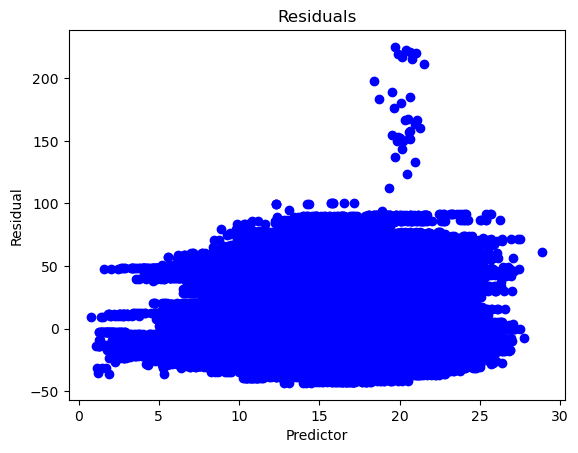

In [155]:
fig,ax=plt.subplots()
ax.scatter(x, y-y_pred_uni,color='b')
ax.set_xlabel('Predictor')
ax.set_ylabel('Residual')
ax.set_title('Residuals')

### Regression Model by State?

In [156]:
states_grouped = data.groupby('stateid')

In [157]:
states_grouped

In [158]:
r2_values = []
all_states = []

for name, group in data.groupby('stateid'):
    # print(name)
    state = states_grouped.get_group(name)
    # print(state)
    x = state['price_diff_percent']
    x2 = sm.add_constant(state['price_diff_percent'])
    y = state['tavg']
    mod = sm.OLS(y,x2).fit()
    # print(mod.summary())

    y_pred = mod.fittedvalues
    # r2 = r2_score(y,y_pred)
    # rmse_err = mean_squared_error(y,y_pred,squared=False)
    # print(rmse_err)
    
    mod_summary = mod.summary()
    mod_summary_text = mod_summary.as_text()
    r_sq_start = mod_summary_text.find("R-squared:")  
    r_sq_end = mod_summary_text.find("\n", r_sq_start)
    r_sq_value = float(mod_summary_text[r_sq_start + len("R-squared:"):r_sq_end].strip())
    # print(r_sq_value)
    r2_values.append([name,r_sq_value])

In [159]:
r2_values = pd.DataFrame(r2_values, columns = ['state','R2'])

In [160]:
r2_values = r2_values.set_index('state')

In [161]:
r2_values['R2'].nlargest(10)

state
IA    0.301
MO    0.287
NE    0.208
IL    0.198
GA    0.152
TN    0.138
CO    0.110
IN    0.105
FL    0.092
VT    0.086
Name: R2, dtype: float64

### Discussion - Efficacy of Univariate Linear Regression Models Created for Singular States

In an attempt to improve on the disappointing performance of the intial linear regression model created, models were ran for each state in the hope that limiting the spatial range of the data to a smaller region might improve the chances of successfully capturing a relationship between temperature and energy-pricing variables. Out of the 50 models produced, only 8 had R2 values of above 0.1. The 5 top performing models (IA, MO, NE, IL, and GA) were then examined more closely. Four of these models (IA, MO, NE, and GA) represented a positive correlation, while IL showed a negative correlation.

Unfortunately, there wasn't a drastic improvement from the first attempt. R2 values were low, (somewhat bafflingly) p values did indicate statistically significant relationships. RMSE values did improve considerably, however.

The residuals for these models at first glance do seem to exhibit a type of pattern where clusters of data points are grouped/plotted along the same y values. I wonder if this has to do with the frequency of sampling of the data.

### Creating Linear Regression Models for the 5 states with highest R2 values

In [162]:
IA = states_grouped.get_group('IA')
MO = states_grouped.get_group('MO')
NE = states_grouped.get_group('NE')
IL = states_grouped.get_group('IL')
GA = states_grouped.get_group('GA')

In [163]:
alpha_IA, loc_IA, beta_IA=stats.gamma.fit(IA['tavg'])
mu_IA, std_IA=stats.norm.fit(IA['tavg'])

alpha_MO, loc_MO, beta_MO=stats.gamma.fit(MO['tavg'])
mu_MO, std_MO=stats.norm.fit(MO['tavg'])

alpha_NE, loc_NE, beta_NE=stats.gamma.fit(NE['tavg'])
mu_NE, std_NE=stats.norm.fit(NE['tavg'])

alpha_IL, loc_IL, beta_IL=stats.gamma.fit(IL['tavg'])
mu_IL, std_IL=stats.norm.fit(IL['tavg'])

alpha_GA, loc_GA, beta_GA=stats.gamma.fit(GA['tavg'])
mu_GA, std_GA=stats.norm.fit(GA['tavg'])

In [164]:
y_IA = IA['price_diff_percent']
x_IA = IA['tavg']

y_MO = MO['price_diff_percent']
x_MO = MO['tavg']

y_NE = NE['price_diff_percent']
x_NE = NE['tavg']

y_IL = IL['price_diff_percent']
x_IL = IL['tavg']

y_GA = GA['price_diff_percent']
x_GA = GA['tavg']

In [165]:
# IA
x2_IA = sm.add_constant(x_IA)
mod_uni_IA = sm.OLS(y_IA,x2_IA).fit()
print(mod_uni_IA.summary())
y_pred_uni_IA = mod_uni_IA.fittedvalues
p_vals_IA = mod_uni_IA.pvalues
print('R^2 = ',mod_uni_IA.rsquared)
rmse_err_uni_IA = mean_squared_error(y_IA, y_pred_uni_IA,squared=False)
print('RMSE = ',rmse_err_uni_IA)
print('p-values for statistical significance:'+str(p_vals_IA))
print('Model params',mod_uni_IA.params)

# MO
x2_MO = sm.add_constant(x_MO)
mod_uni_MO = sm.OLS(y_MO,x2_MO).fit()
print(mod_uni_MO.summary())
y_pred_uni_MO = mod_uni_MO.fittedvalues
p_vals_MO = mod_uni_MO.pvalues
print('R^2 = ',mod_uni_MO.rsquared)
rmse_err_uni_MO = mean_squared_error(y_MO, y_pred_uni_MO,squared=False)
print('RMSE = ',rmse_err_uni_MO)
print('p-values for statistical significance:'+str(p_vals_MO))
print('Model params',mod_uni_MO.params)

# NE
x2_NE = sm.add_constant(x_NE)
mod_uni_NE = sm.OLS(y_NE,x2_NE).fit()
print(mod_uni_NE.summary())
y_pred_uni_NE = mod_uni_NE.fittedvalues
p_vals_NE = mod_uni_NE.pvalues
print('R^2 = ',mod_uni_NE.rsquared)
rmse_err_uni_NE = mean_squared_error(y_NE, y_pred_uni_NE,squared=False)
print('RMSE = ',rmse_err_uni_NE)
print('p-values for statistical significance:'+str(p_vals_NE))
print('Model params',mod_uni_NE.params)

# IL
x2_IL = sm.add_constant(x_IL)
mod_uni_IL = sm.OLS(y_IL,x2_IL).fit()
print(mod_uni_IL.summary())
y_pred_uni_IL = mod_uni_IL.fittedvalues
p_vals_IL = mod_uni_IL.pvalues
print('R^2 = ',mod_uni_IL.rsquared)
rmse_err_uni_IL = mean_squared_error(y_IL, y_pred_uni_IL,squared=False)
print('RMSE = ',rmse_err_uni_IL)
print('p-values for statistical significance:'+str(p_vals_IL))
print('Model params',mod_uni_IL.params)

# GA
x2_GA = sm.add_constant(x_GA)
mod_uni_GA = sm.OLS(y_GA,x2_GA).fit()
print(mod_uni_GA.summary())
y_pred_uni_GA = mod_uni_GA.fittedvalues
p_vals_GA = mod_uni_GA.pvalues
print('R^2 = ',mod_uni_GA.rsquared)
rmse_err_uni_GA = mean_squared_error(y_GA, y_pred_uni_GA,squared=False)
print('RMSE = ',rmse_err_uni_GA)
print('p-values for statistical significance:'+str(p_vals_GA))
print('Model params',mod_uni_GA.params)

                            OLS Regression Results                            
Dep. Variable:     price_diff_percent   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     2199.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:14:32   Log-Likelihood:                -15602.
No. Observations:                5118   AIC:                         3.121e+04
Df Residuals:                    5116   BIC:                         3.122e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.5583      0.257    -64.346      0.0

Text(0.5, 1.0, 'Univariate Linear Regression - GA')

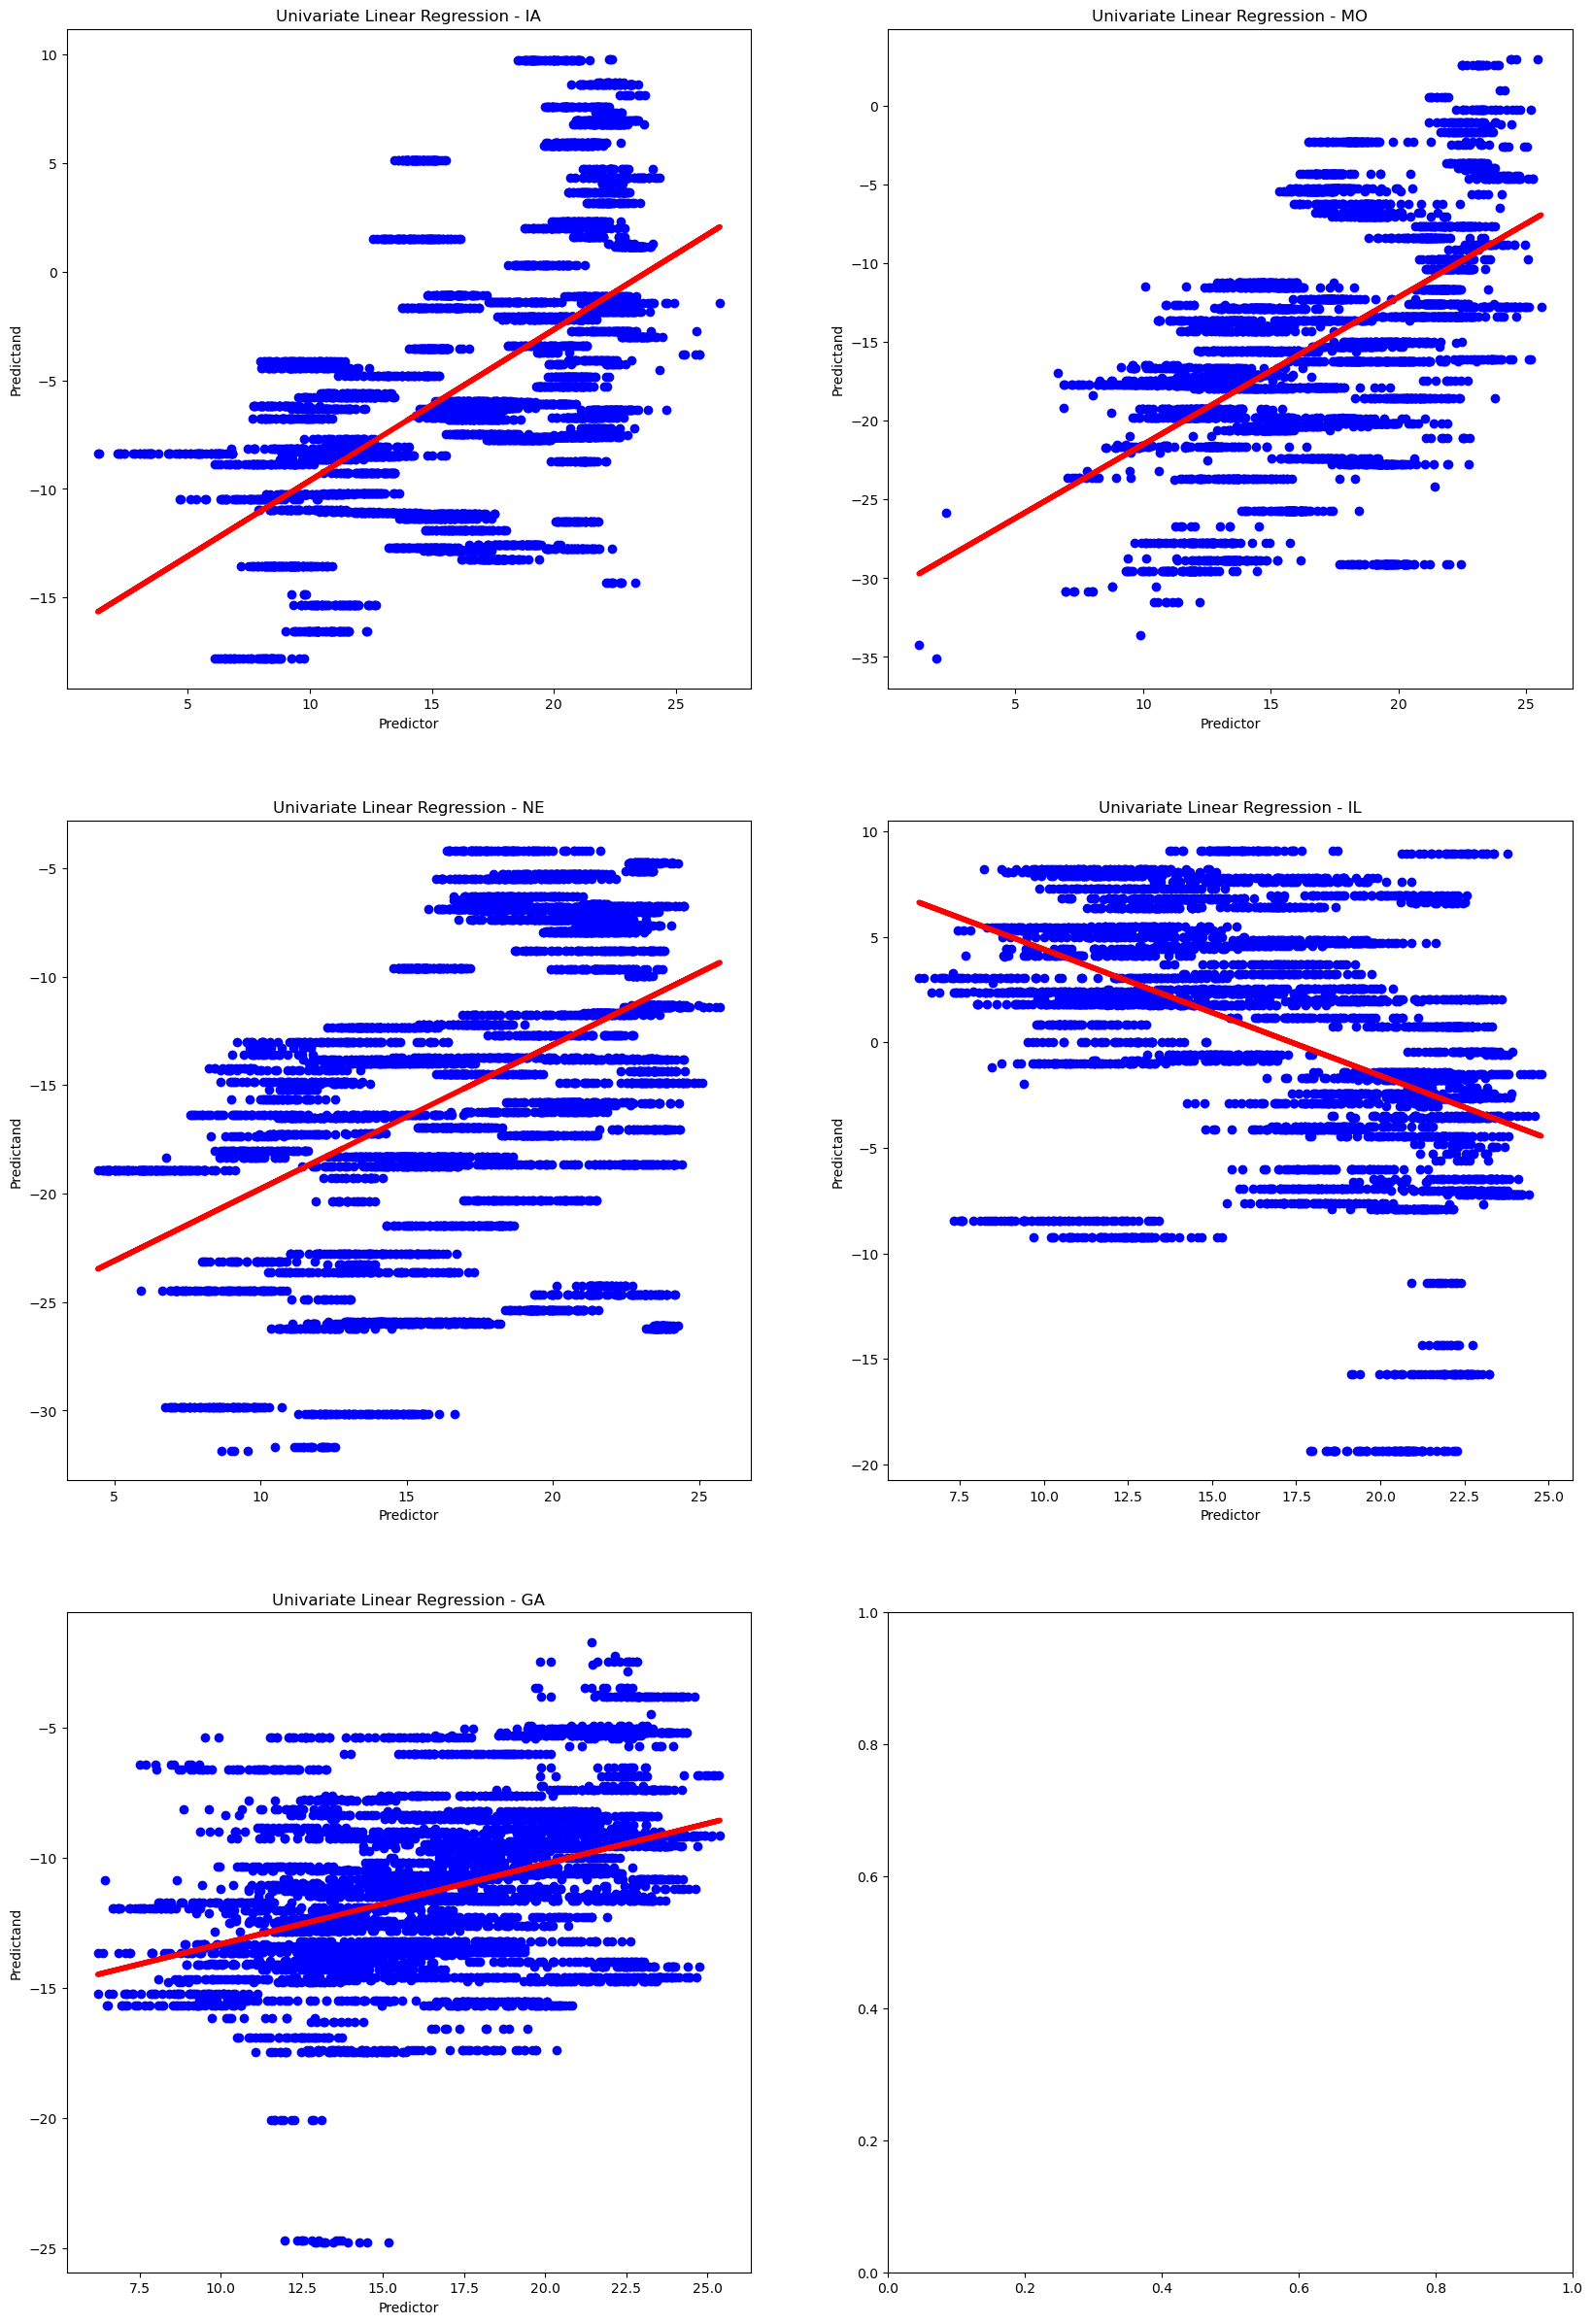

In [166]:
fig,axes=plt.subplots(3,2, figsize=[20,30])

axes[0,0].scatter(x_IA, y_IA, color='blue')
axes[0,0].plot(x_IA, y_pred_uni_IA, color='red',linewidth=4)
axes[0,0].set_xlabel('Predictor')
axes[0,0].set_ylabel('Predictand')
axes[0,0].set_title('Univariate Linear Regression - IA')

axes[0,1].scatter(x_MO, y_MO, color='blue')
axes[0,1].plot(x_MO, y_pred_uni_MO, color='red',linewidth=4)
axes[0,1].set_xlabel('Predictor')
axes[0,1].set_ylabel('Predictand')
axes[0,1].set_title('Univariate Linear Regression - MO')

axes[1,0].scatter(x_NE, y_NE, color='blue')
axes[1,0].plot(x_NE, y_pred_uni_NE, color='red',linewidth=4)
axes[1,0].set_xlabel('Predictor')
axes[1,0].set_ylabel('Predictand')
axes[1,0].set_title('Univariate Linear Regression - NE')

axes[1,1].scatter(x_IL, y_IL, color='blue')
axes[1,1].plot(x_IL, y_pred_uni_IL, color='red',linewidth=4)
axes[1,1].set_xlabel('Predictor')
axes[1,1].set_ylabel('Predictand')
axes[1,1].set_title('Univariate Linear Regression - IL')

axes[2,0].scatter(x_GA, y_GA, color='blue')
axes[2,0].plot(x_GA, y_pred_uni_GA, color='red',linewidth=4)
axes[2,0].set_xlabel('Predictor')
axes[2,0].set_ylabel('Predictand')
axes[2,0].set_title('Univariate Linear Regression - GA')

Text(0.5, 1.0, 'Residuals - GA')

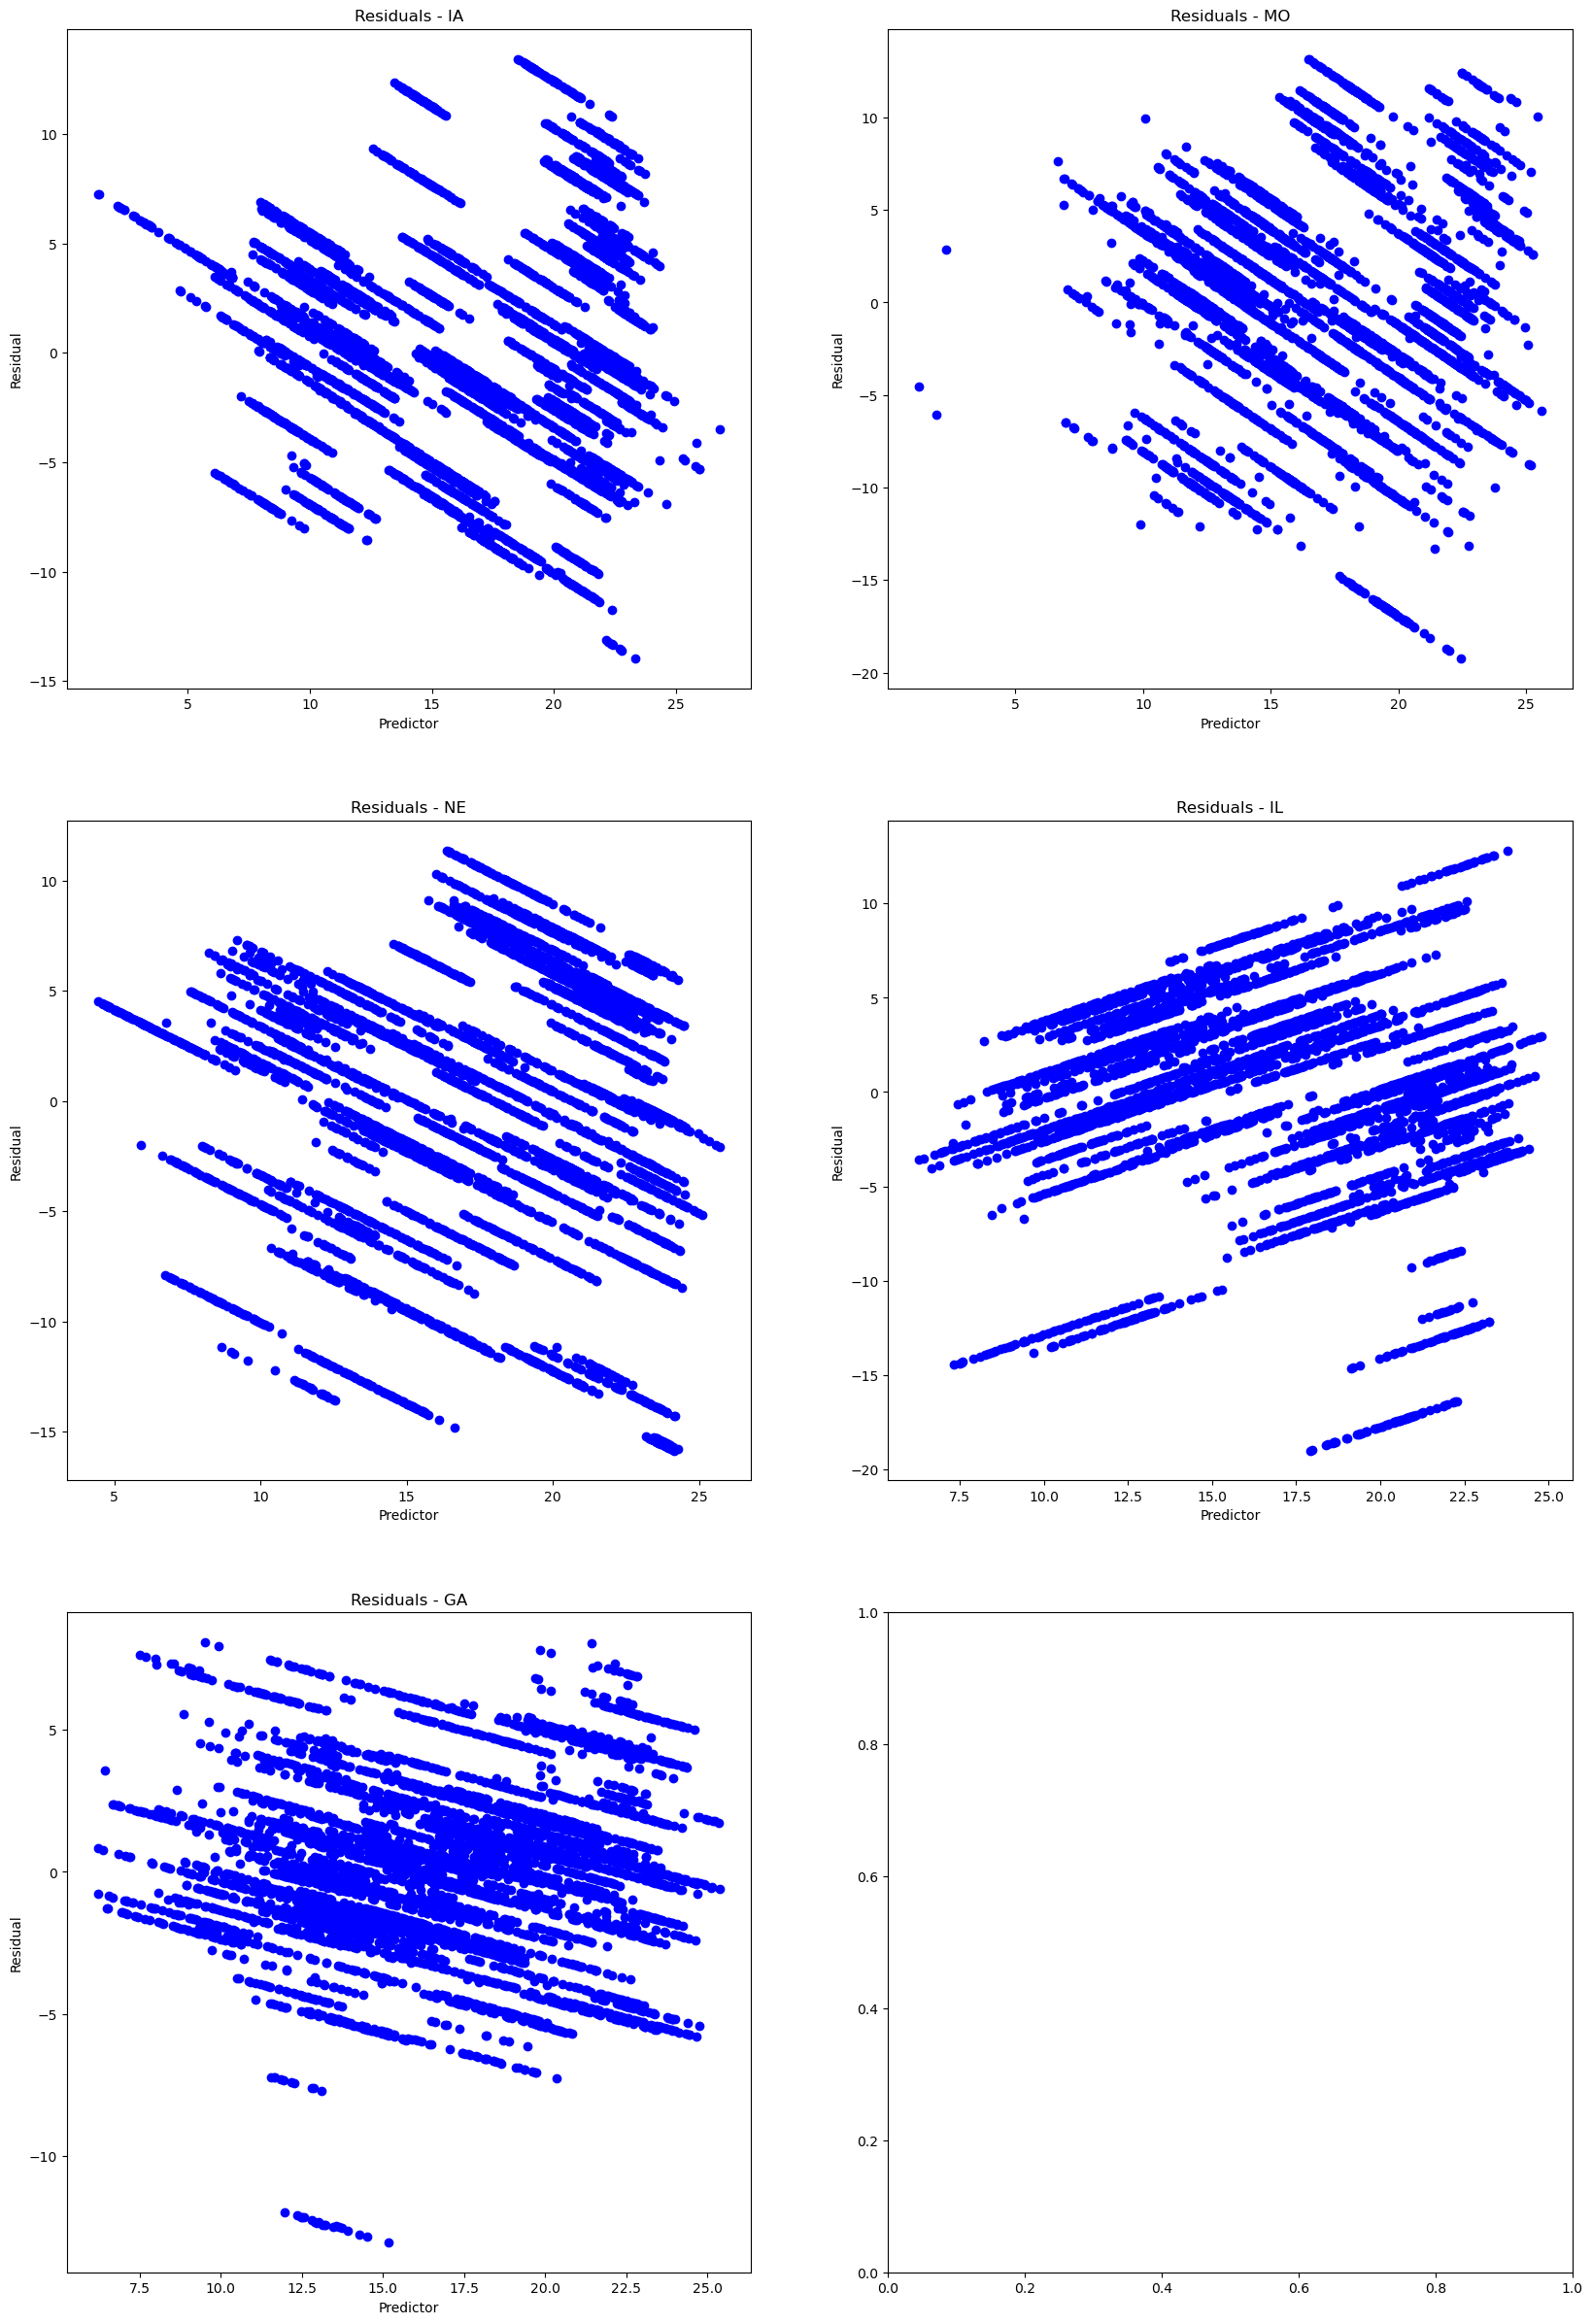

In [167]:
fig,axes=plt.subplots(3,2, figsize=[20,30])

axes[0,0].scatter(x_IA, y_IA-y_pred_uni_IA,color='b')
axes[0,0].set_xlabel('Predictor')
axes[0,0].set_ylabel('Residual')
axes[0,0].set_title('Residuals - IA')

axes[0,1].scatter(x_MO, y_MO-y_pred_uni_MO,color='b')
axes[0,1].set_xlabel('Predictor')
axes[0,1].set_ylabel('Residual')
axes[0,1].set_title('Residuals - MO')

axes[1,0].scatter(x_NE, y_NE-y_pred_uni_NE,color='b')
axes[1,0].set_xlabel('Predictor')
axes[1,0].set_ylabel('Residual')
axes[1,0].set_title('Residuals - NE')

axes[1,1].scatter(x_IL, y_IL-y_pred_uni_IL,color='b')
axes[1,1].set_xlabel('Predictor')
axes[1,1].set_ylabel('Residual')
axes[1,1].set_title('Residuals - IL')

axes[2,0].scatter(x_GA, y_GA-y_pred_uni_GA,color='b')
axes[2,0].set_xlabel('Predictor')
axes[2,0].set_ylabel('Residual')
axes[2,0].set_title('Residuals - GA')

### Applying Yeo-Johnson Transformation

In [171]:
data_yj = data.copy()

In [172]:
numeric = data_yj.select_dtypes(include=['float64', 'int64']).columns

for col in numeric:
    data_yj[col], lambda_val = stats.yeojohnson(data_yj[col])

In [173]:
data_yj

period stateid  customers     price  customers_natl  price_natl  \
3      2013-07-01      AK  16.781973  0.661829         0.66588    0.363602   
4      2016-07-01      AK  16.813744  0.662741         0.66588    0.363604   
5      2017-07-01      AK  16.830879  0.663112         0.66588    0.363625   
6      2018-07-01      AK  16.841755  0.663619         0.66588    0.363627   
7      2021-07-01      AK  16.873375  0.663671         0.66588    0.363658   
...           ...     ...        ...       ...             ...         ...   
331085 2019-02-01      HI  17.581436  0.665966         0.66588    0.363606   
331086 2019-03-01      HI  17.582930  0.666025         0.66588    0.363612   
331087 2020-02-01      HI  17.594830  0.665942         0.66588    0.363611   
331088 2021-02-01      HI  17.601829  0.665808         0.66588    0.363621   
331089 2021-03-01      HI  17.603589  0.665898         0.66588    0.363632   

        price_diff  price_diff_percent  chang_price_diff  \
3         3.370114           26.281132          2.015935   
4         3.950431           31.791616          2.916883   
5         4.091940           32.392486          3.130002   
6         4.462795           35.967635          3.680288   
7         4.307636           33.033369          3.451340   
...            ...                 ...               ...   
331085    6.916315           64.964083          6.325293   
331086    6.972533           65.190316          6.452768   
331087    6.865574           63.936605          6.247430   
331088    6.653253           60.618087          5.920400   
331089    6.723339           60.631521          6.071515   

        chang_price_diff_pct  ...       tmax       tmin       tavg  \
3                   9.744997  ...  19.260429   9.297794  14.279112   
4                  23.066530  ...  14.547167   6.979478  10.763320   
5                  24.550631  ...  16.564400   8.040203  12.302301   
6                  33.508228  ...  16.815611   5.707248  11.261430   
7                  26.140398  ...  16.532335   9.086397  12.809365   
...                      ...  ...        ...        ...        ...   
331085             76.549789  ...  24.132353  16.497728  20.315039   
331086             78.610440  ...  25.050985  15.986032  20.518507   
331087             73.512121  ...  24.964176  16.966955  20.965563   
331088             63.782229  ...  24.880306  16.346146  20.613224   
331089             65.216651  ...  23.651667  16.348507  20.000084   

       heating_days cooling_days heating_diff cooling_diff tmax_diff  \
3          4.300938     3.347292    -2.802485     3.007782  2.297398   
4          8.183229     1.321626     1.079807     0.982116 -2.415865   
5          6.238169     0.183094    -0.865254    -0.156416 -0.398632   
6          7.339495     0.955843     0.236072     0.616333 -0.147421   
7          5.732557     0.733637    -1.370866     0.394127 -0.430696   
...             ...          ...          ...          ...       ...   
331085     1.119173     2.220236     0.472053     0.529233  0.651871   
331086     0.197773     2.349517    -0.591254     0.185530  0.955164   
331087     0.639182     3.009702    -0.007938     1.318700  1.483694   
331088     0.271521     2.374388    -0.375600     0.683386  1.399824   
331089     0.259716     1.799612    -0.529311    -0.364375 -0.444155   

       tmin_diff tavg_diff  
3       2.360438  2.328917  
4       0.042122 -1.186875  
5       1.102847  0.352106  
6      -1.230108 -0.688766  
7       2.149041  0.859170  
...          ...       ...  
331085  0.430565  0.541216  
331086  0.420832  0.687998  
331087  0.899792  1.191740  
331088  0.278982  0.839401  
331089  0.783307  0.169575  

[231494 rows x 31 columns]

### Linear Regression with data modified with Yeo-Johnson transformation

In [174]:
alpha_yj, loc_yj, beta_yj=stats.gamma.fit(data_yj['tavg'])
mu_yj, std_yj=stats.norm.fit(data_yj['tavg'])

In [175]:
y_yj = data_yj['price_diff_percent']
x_yj = data_yj['tavg']

In [176]:
x2_yj = sm.add_constant(x_yj)
mod_uni_yj = sm.OLS(y_yj,x2_yj).fit()
print(mod_uni_yj.summary())
y_pred_uni_yj = mod_uni_yj.fittedvalues
p_vals_yj = mod_uni_yj.pvalues
print('R^2 = ',mod_uni_yj.rsquared)
rmse_err_uni_yj = mean_squared_error(y_yj, y_pred_uni_yj,squared=False)
print('RMSE = ',rmse_err_uni_yj)
print('p-values for statistical significance:'+str(p_vals_yj))
print('Model params',mod_uni_yj.params)

                            OLS Regression Results                            
Dep. Variable:     price_diff_percent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.397
Date:                Tue, 12 Dec 2023   Prob (F-statistic):             0.0360
Time:                        04:14:36   Log-Likelihood:            -1.0251e+06
No. Observations:              231494   AIC:                         2.050e+06
Df Residuals:                  231492   BIC:                         2.050e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3308      0.191    -54.058      0.0

### Discussion - Efficacy of Univariate Linear Regression Model Created with data transformed by the Yeo-Johnson transformation

Although the effect produced on the datas' fit to both normal and gamma distributions by applying the Yeo-Johnson transformation to the data was encouraging, I do not see a similarly marked improvement in the quality of the linear regression model produced using the transformed data (either in the model produced with data from all states or the models produced for those just for the states with the highest R2 values).

In [177]:
fig,ax=plt.subplots()
ax.scatter(x_yj, y_yj, color='blue')

ax.set_xlabel('Predictor')
ax.set_ylabel('Predictand')
ax.set_title('Univariate Linear Regression, data modified by Yeo-Johnson transformation')

ax.plot(x_yj, y_pred_uni_yj, color='red',linewidth=4)

In [178]:
fig,ax=plt.subplots()
ax.scatter(x_yj, y_yj-y_pred_uni_yj,color='b')
ax.set_xlabel('Predictor')
ax.set_ylabel('Residual')
ax.set_title('Residuals with data modified by Yeo-Johnson transformation')

Text(0.5, 1.0, 'Residuals with data modified by Yeo-Johnson transformation')

### Regression Model by State with data modified by Yeo-Johnson transformation

In [179]:
states_grouped_yj = data_yj.groupby('stateid')

In [180]:
states_grouped_yj

In [181]:
r2_values_yj = []
all_states_yj = []

for name, group in states_grouped_yj:
    # print(name)
    state = states_grouped_yj.get_group(name)
    # print(state)
    x_yj = state['price_diff_percent']
    x2_yj = sm.add_constant(state['price_diff_percent'])
    y_yj = state['tavg']
    mod_yj = sm.OLS(y_yj,x2_yj).fit()
    # print(mod.summary())

    y_pred_yj = mod_yj.fittedvalues
    # r2_yj = r2_score(y_yj,y_pred_yj)
    # rmse_err = mean_squared_error(y,y_pred,squared=False)
    # print(rmse_err)
    
    mod_summary_yj = mod_yj.summary()
    mod_summary_text = mod_summary_yj.as_text()
    r_sq_start = mod_summary_text.find("R-squared:")  
    r_sq_end = mod_summary_text.find("\n", r_sq_start)
    r_sq_value_yj = float(mod_summary_text[r_sq_start + len("R-squared:"):r_sq_end].strip())
    # print(r_sq_value)
    r2_values_yj.append([name,r_sq_value_yj])

In [182]:
r2_values_yj = pd.DataFrame(r2_values_yj, columns = ['state','R2'])

In [183]:
r2_values_yj = r2_values_yj.set_index('state')

In [184]:
r2_values_yj['R2'].nlargest(10)

state
IA    0.304
MO    0.278
NE    0.202
IL    0.164
GA    0.150
TN    0.137
CO    0.103
FL    0.102
IN    0.094
VT    0.085
Name: R2, dtype: float64

### Creating Linear Regression Models for the 5 states with highest R2 values with data modified by the Yeo-Johnson transformation

In [185]:
IA_yj = states_grouped_yj.get_group('IA')
MO_yj = states_grouped_yj.get_group('MO')
NE_yj = states_grouped_yj.get_group('NE')
IL_yj = states_grouped_yj.get_group('IL')
GA_yj = states_grouped_yj.get_group('GA')

In [186]:
alpha_IA_yj, loc_IA_yj, beta_IA_yj=stats.gamma.fit(IA_yj['tavg'])
mu_IA_yj, std_IA_yj=stats.norm.fit(IA_yj['tavg'])

alpha_MO_yj, loc_MO_yj, beta_MO_yj=stats.gamma.fit(MO_yj['tavg'])
mu_MO_yj, std_MO_yj=stats.norm.fit(MO_yj['tavg'])

alpha_NE_yj, loc_NE_yj, beta_NE_yj=stats.gamma.fit(NE_yj['tavg'])
mu_NE_yj, std_NE_yj=stats.norm.fit(NE_yj['tavg'])

alpha_IL_yj, loc_IL_yj, beta_IL_yj=stats.gamma.fit(IL_yj['tavg'])
mu_IL_yj, std_IL_yj=stats.norm.fit(IL_yj['tavg'])

alpha_GA_yj, loc_GA_yj, beta_GA_yj=stats.gamma.fit(GA_yj['tavg'])
mu_GA_yj, std_GA_yj=stats.norm.fit(GA_yj['tavg'])

In [187]:
y_IA_yj = IA_yj['price_diff_percent']
x_IA_yj = IA_yj['tavg']

y_MO_yj = MO_yj['price_diff_percent']
x_MO_yj = MO_yj['tavg']

y_NE_yj = NE_yj['price_diff_percent']
x_NE_yj = NE_yj['tavg']

y_IL_yj = IL_yj['price_diff_percent']
x_IL_yj = IL_yj['tavg']

y_GA_yj = GA_yj['price_diff_percent']
x_GA_yj = GA_yj['tavg']

In [188]:
# IA_yj
x2_IA_yj = sm.add_constant(x_IA_yj)
mod_uni_IA_yj = sm.OLS(y_IA_yj,x2_IA_yj).fit()
print(mod_uni_IA_yj.summary())
y_pred_uni_IA_yj = mod_uni_IA_yj.fittedvalues
p_vals_IA_yj = mod_uni_IA_yj.pvalues
print('R^2 = ',mod_uni_IA_yj.rsquared)
rmse_err_uni_IA_yj = mean_squared_error(y_IA_yj, y_pred_uni_IA_yj,squared=False)
print('RMSE = ',rmse_err_uni_IA_yj)
print('p-values for statistical significance:'+str(p_vals_IA_yj))
print('Model params',mod_uni_IA_yj.params)

# MO
x2_MO_yj = sm.add_constant(x_MO_yj)
mod_uni_MO_yj = sm.OLS(y_MO_yj,x2_MO_yj).fit()
print(mod_uni_MO_yj.summary())
y_pred_uni_MO_yj = mod_uni_MO_yj.fittedvalues
p_vals_MO_yj = mod_uni_MO_yj.pvalues
print('R^2 = ',mod_uni_MO_yj.rsquared)
rmse_err_uni_MO_yj = mean_squared_error(y_MO_yj, y_pred_uni_MO_yj,squared=False)
print('RMSE = ',rmse_err_uni_MO_yj)
print('p-values for statistical significance:'+str(p_vals_MO_yj))
print('Model params',mod_uni_MO_yj.params)

# NE
x2_NE_yj = sm.add_constant(x_NE_yj)
mod_uni_NE_yj = sm.OLS(y_NE,x2_NE_yj).fit()
print(mod_uni_NE_yj.summary())
y_pred_uni_NE_yj = mod_uni_NE_yj.fittedvalues
p_vals_NE_yj = mod_uni_NE_yj.pvalues
print('R^2 = ',mod_uni_NE_yj.rsquared)
rmse_err_uni_NE_yj = mean_squared_error(y_NE_yj, y_pred_uni_NE_yj,squared=False)
print('RMSE = ',rmse_err_uni_NE_yj)
print('p-values for statistical significance:'+str(p_vals_NE_yj))
print('Model params',mod_uni_NE_yj.params)

# IL
x2_IL_yj = sm.add_constant(x_IL_yj)
mod_uni_IL_yj = sm.OLS(y_IL_yj,x2_IL_yj).fit()
print(mod_uni_IL_yj.summary())
y_pred_uni_IL_yj = mod_uni_IL_yj.fittedvalues
p_vals_IL_yj = mod_uni_IL_yj.pvalues
print('R^2 = ',mod_uni_IL_yj.rsquared)
rmse_err_uni_IL_yj = mean_squared_error(y_IL_yj, y_pred_uni_IL_yj,squared=False)
print('RMSE = ',rmse_err_uni_IL_yj)
print('p-values for statistical significance:'+str(p_vals_IL_yj))
print('Model params',mod_uni_IL_yj.params)

# GA
x2_GA_yj = sm.add_constant(x_GA_yj)
mod_uni_GA_yj = sm.OLS(y_GA_yj,x2_GA_yj).fit()
print(mod_uni_GA_yj.summary())
y_pred_uni_GA_yj = mod_uni_GA_yj.fittedvalues
p_vals_GA_yj = mod_uni_GA_yj.pvalues
print('R^2 = ',mod_uni_GA_yj.rsquared)
rmse_err_uni_GA_yj = mean_squared_error(y_GA_yj, y_pred_uni_GA_yj,squared=False)
print('RMSE = ',rmse_err_uni_GA_yj)
print('p-values for statistical significance:'+str(p_vals_GA_yj))
print('Model params',mod_uni_GA_yj.params)

                            OLS Regression Results                            
Dep. Variable:     price_diff_percent   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     2232.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:17:49   Log-Likelihood:                -17020.
No. Observations:                5118   AIC:                         3.404e+04
Df Residuals:                    5116   BIC:                         3.406e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.2236      0.339    -68.412      0.0

In [189]:
fig,axes=plt.subplots(3,2, figsize=[20,30])

axes[0,0].scatter(x_IA_yj, y_IA_yj, color='blue')
axes[0,0].plot(x_IA_yj, y_pred_uni_IA_yj, color='red',linewidth=4)
axes[0,0].set_xlabel('Predictor')
axes[0,0].set_ylabel('Predictand')
axes[0,0].set_title('Univariate Linear Regression with data modified by the Yeo-Johnson transformation - IA')

axes[0,1].scatter(x_MO_yj, y_MO_yj, color='blue')
axes[0,1].plot(x_MO_yj, y_pred_uni_MO_yj, color='red',linewidth=4)
axes[0,1].set_xlabel('Predictor')
axes[0,1].set_ylabel('Predictand')
axes[0,1].set_title('Univariate Linear Regression with data modified by the Yeo-Johnson transformation - MO')

axes[1,0].scatter(x_NE_yj, y_NE_yj, color='blue')
axes[1,0].plot(x_NE_yj, y_pred_uni_NE_yj, color='red',linewidth=4)
axes[1,0].set_xlabel('Predictor')
axes[1,0].set_ylabel('Predictand')
axes[1,0].set_title('Univariate Linear Regression with data modified by the Yeo-Johnson transformation - NE')

axes[1,1].scatter(x_IL_yj, y_IL_yj, color='blue')
axes[1,1].plot(x_IL_yj, y_pred_uni_IL_yj, color='red',linewidth=4)
axes[1,1].set_xlabel('Predictor')
axes[1,1].set_ylabel('Predictand')
axes[1,1].set_title('Univariate Linear Regression with data modified by the Yeo-Johnson transformation - IL')

axes[2,0].scatter(x_GA_yj, y_GA_yj, color='blue')
axes[2,0].plot(x_GA_yj, y_pred_uni_GA_yj, color='red',linewidth=4)
axes[2,0].set_xlabel('Predictor')
axes[2,0].set_ylabel('Predictand')
axes[2,0].set_title('Univariate Linear Regression with data modified by the Yeo-Johnson transformation - GA')

Text(0.5, 1.0, 'Univariate Linear Regression with data modified by the Yeo-Johnson transformation - GA')

In [190]:
fig,axes=plt.subplots(3,2, figsize=[20,30])

axes[0,0].scatter(x_IA_yj, y_IA_yj-y_pred_uni_IA_yj,color='b')
axes[0,0].set_xlabel('Predictor')
axes[0,0].set_ylabel('Residual')
axes[0,0].set_title('Residuals with data modified by the Yeo-Johnson transformation - IA')

axes[0,1].scatter(x_MO_yj, y_MO_yj-y_pred_uni_MO_yj,color='b')
axes[0,1].set_xlabel('Predictor')
axes[0,1].set_ylabel('Residual')
axes[0,1].set_title('Residuals with data modified by the Yeo-Johnson transformation - MO')

axes[1,0].scatter(x_NE_yj, y_NE_yj-y_pred_uni_NE_yj,color='b')
axes[1,0].set_xlabel('Predictor')
axes[1,0].set_ylabel('Residual')
axes[1,0].set_title('Residuals with data modified by the Yeo-Johnson transformation - NE')

axes[1,1].scatter(x_IL_yj, y_IL_yj-y_pred_uni_IL_yj,color='b')
axes[1,1].set_xlabel('Predictor')
axes[1,1].set_ylabel('Residual')
axes[1,1].set_title('Residuals with data modified by the Yeo-Johnson transformation - IL')

axes[2,0].scatter(x_GA_yj, y_GA_yj-y_pred_uni_GA_yj,color='b')
axes[2,0].set_xlabel('Predictor')
axes[2,0].set_ylabel('Residual')
axes[2,0].set_title('Residuals with data modified by the Yeo-Johnson transformation - GA')

Text(0.5, 1.0, 'Residuals with data modified by the Yeo-Johnson transformation - GA')

### Conclusions and Future Work

Although some correllation between more severe temperature events (and norms) and the energy costs (as represented by the price of electricity in the residential sector) can be seen[^1], this investigation did not adequately capture that relationship with a linear regression model. 
Furthermore, I question whether that correllation is significant enough to pursue an investigation into a predictor/predictand relationship between variables from these two datasets.

I think it's plausible that there are "better" ways to look at the relationship between climate change and our society's energy usage and energy affordability. For starters, I do have concerns that the data used: namely, using retail electricity prices for the residential sector as representative of the much broader category of "energy costs" and using maximum/minimum daily temperatures (even spatially/temporally average) as representative of the effects of climate change could be a flawed methodology. The temperature data may be too general, while the electricity data may be too niche. 

However, I do still think that modelling the potential impacts of climate change on energy affordability, and (continuing down that path) the potential ramifications of that relationship for our society is worthy of pursuit. For further work, I would probably pivot and take a step back, and look for different datasets to work with: I think it might be useful to approach this initially from a more sociological perspective. Using census and similar datasets, I could investigate if there is an existing relationship between socioeconomic or demographic characteristics, urbanity, or development level and energy affordability. I would also like to investigate a "better" way to generalize the effects of climate change--perhaps looking at the frequency of storms, or looking at temperature-wave data, or a more sophisticated combination of factors than addressed here. 

[^1] Based upon visual inspection of the contourf plots created showing correlation across the US between different variables.